# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [239]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV as gridsearch

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

## Data Overview

- Observations
- Sanity checks

In [305]:
og_data = pd.read_csv('INNHotelsGroup.csv')
data = pd.read_csv('INNHotelsGroup.csv')

In [241]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [242]:
data.shape

(36275, 19)

In [243]:
data['booking_status'].replace(['Not_Canceled','Canceled'],[0,1],inplace=True)

In [244]:
data['repeated_guest'].replace([0,1],['No','Yes'],inplace=True)

In [245]:
data['required_car_parking_space'].replace([0,1],['No','Yes'],inplace=True)

In [246]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,No,Room_Type 1,224,2017,10,2,Offline,No,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,No,Room_Type 1,5,2018,11,6,Online,No,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,No,Room_Type 1,1,2018,2,28,Online,No,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,No,Room_Type 1,211,2018,5,20,Online,No,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,No,Room_Type 1,48,2018,4,11,Online,No,0,0,94.50,0,1


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [248]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,2017.820427,7.423653,15.596995,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,85.930817,0.383836,3.069894,8.740447,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,540.000000,5.000000,1.000000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [249]:
def hist_box (data,x_var):
    plt.figure(figsize=(7,7))

    plt.subplot(2,1,1)
    sns.histplot(data, x= x_var , kde=True)

    plt.subplot(2,1,2)
    sns.boxplot(data, x= x_var)

    plt.show()

Mean for lead_time
85.23255685733976
Histogram and Boxplot for lead_time


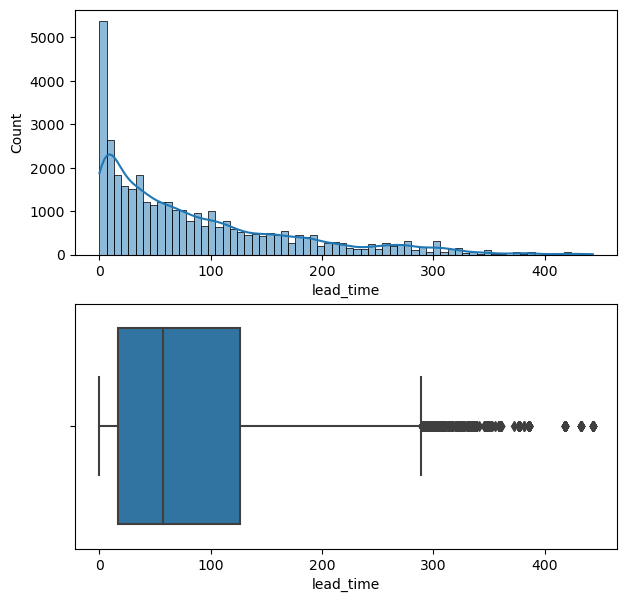

Mean for avg_price_per_room
103.42353907649897
Histogram and Boxplot for avg_price_per_room


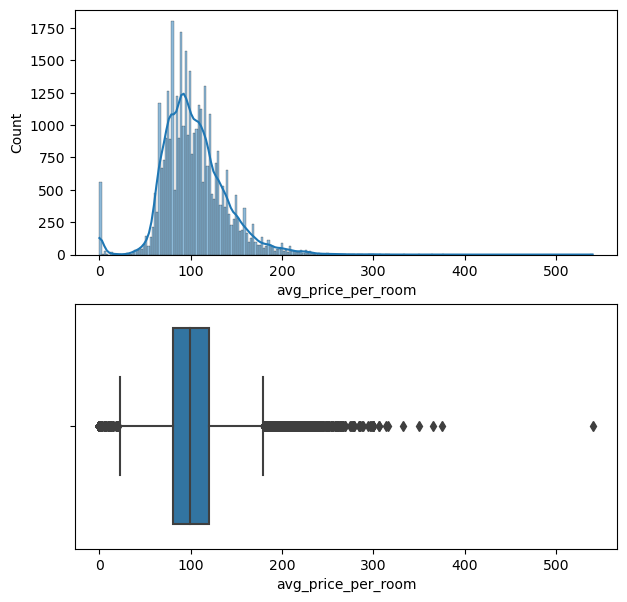

In [250]:
numericallist = ['lead_time','avg_price_per_room']
for i in numericallist:
    print('Mean for', i)
    print(data[i].mean())
    print('Histogram and Boxplot for', i)
    hist_box(data,i)
        

#### Observations
The mean lead time is about 85 days with a right skew. Although the highest count lead time is zero days, meaning people book the day they arrive at the hotel. 

The mean price per room is around 103 euros. This is also right skewed. There are some prices at 0 euros, which may have to do with the market segment. 

In [251]:
def countplot(data, x_var):
    plt.xticks(rotation=90)
    sns.countplot(data, x = x_var)
    plt.show()

Countplot for no_of_adults
no_of_adults
2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: proportion, dtype: float64


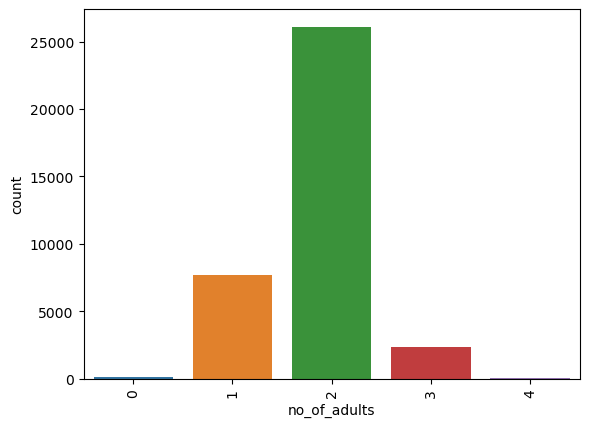

Countplot for no_of_children
no_of_children
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: proportion, dtype: float64


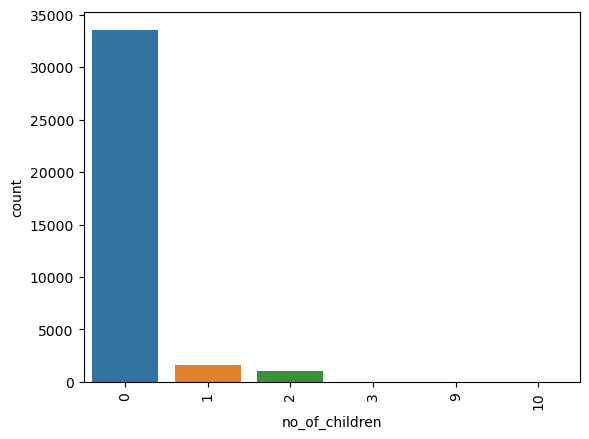

Countplot for no_of_weekend_nights
no_of_weekend_nights
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: proportion, dtype: float64


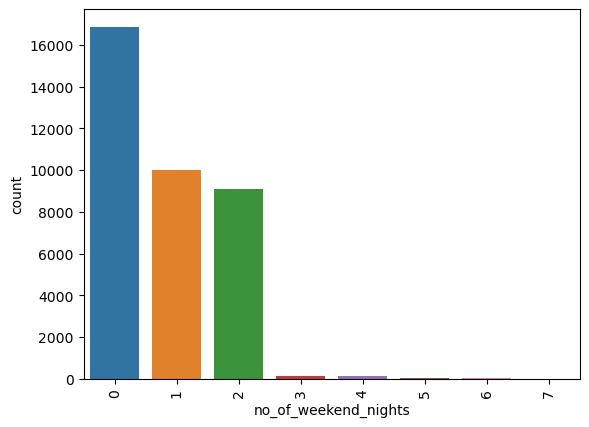

Countplot for no_of_week_nights
no_of_week_nights
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: proportion, dtype: float64


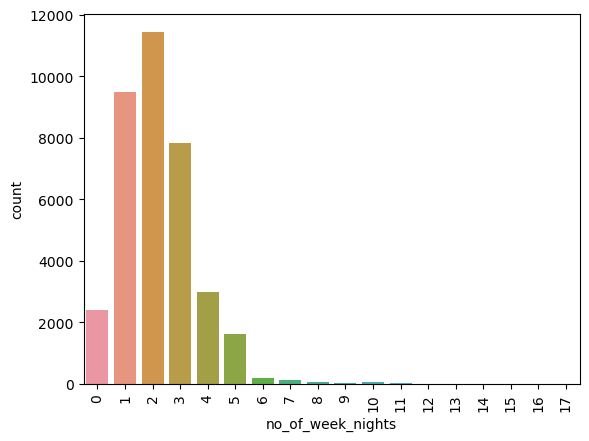

Countplot for type_of_meal_plan
type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64


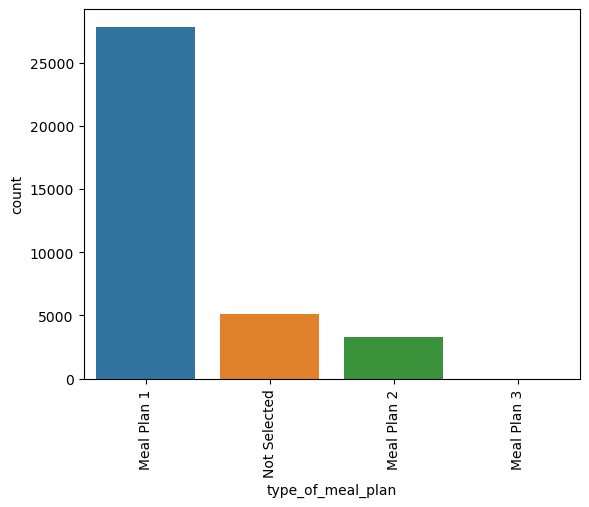

Countplot for required_car_parking_space
required_car_parking_space
No     0.969014
Yes    0.030986
Name: proportion, dtype: float64


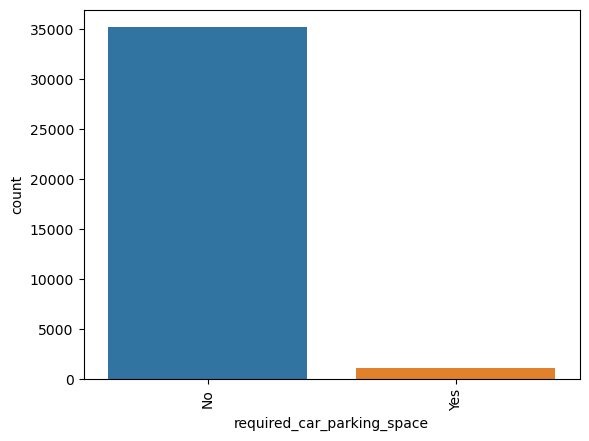

Countplot for room_type_reserved
room_type_reserved
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: proportion, dtype: float64


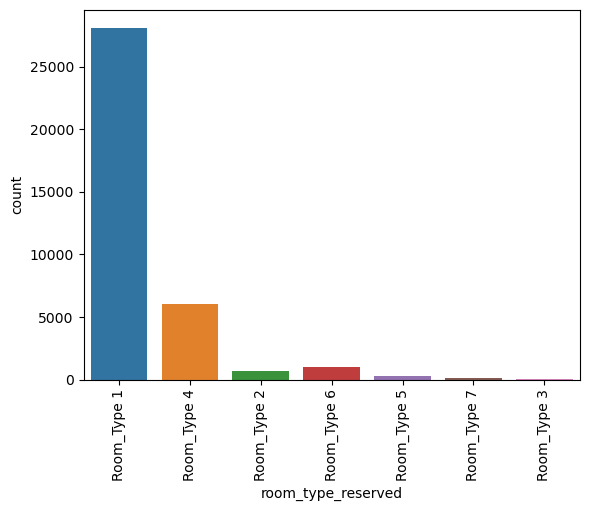

Countplot for arrival_year
arrival_year
2018    0.820427
2017    0.179573
Name: proportion, dtype: float64


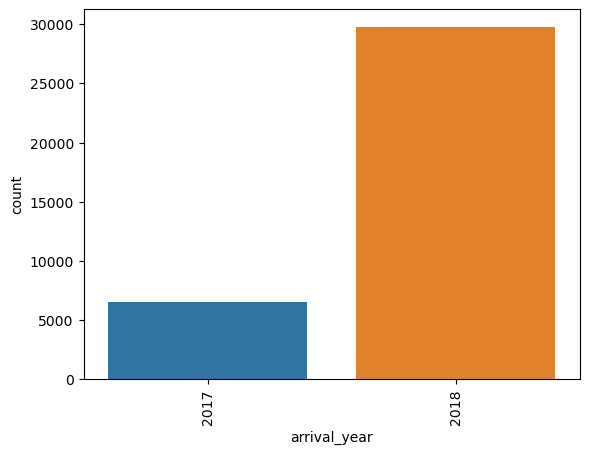

Countplot for arrival_month
arrival_month
10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: proportion, dtype: float64


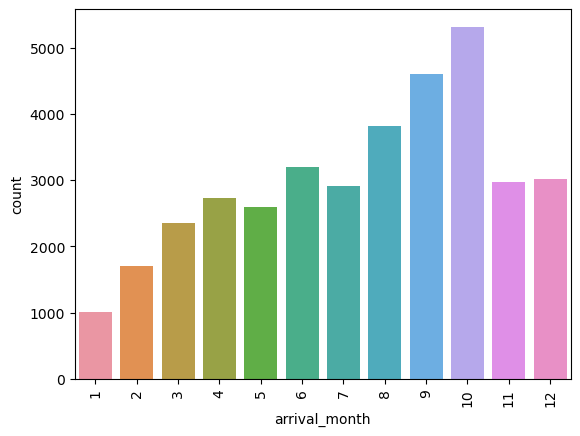

Countplot for arrival_date
arrival_date
13    0.037436
17    0.037078
2     0.036692
4     0.036582
19    0.036582
16    0.036003
20    0.035314
15    0.035093
6     0.035093
18    0.034735
14    0.034238
30    0.033522
12    0.033191
8     0.033025
29    0.032805
21    0.031923
5     0.031813
26    0.031592
25    0.031592
1     0.031234
9     0.031151
28    0.031123
7     0.030600
24    0.030407
11    0.030269
3     0.030269
10    0.030021
27    0.029194
22    0.028201
23    0.027292
31    0.015934
Name: proportion, dtype: float64


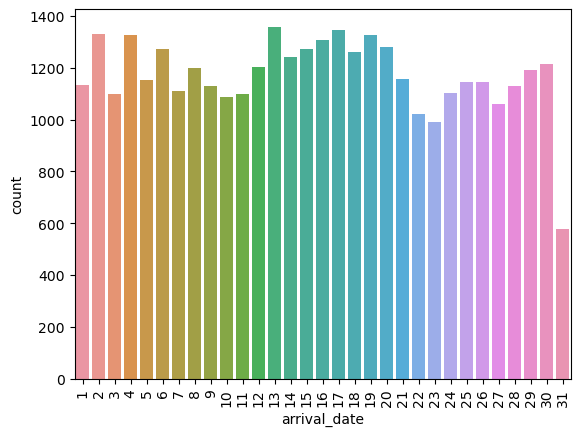

Countplot for market_segment_type
market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64


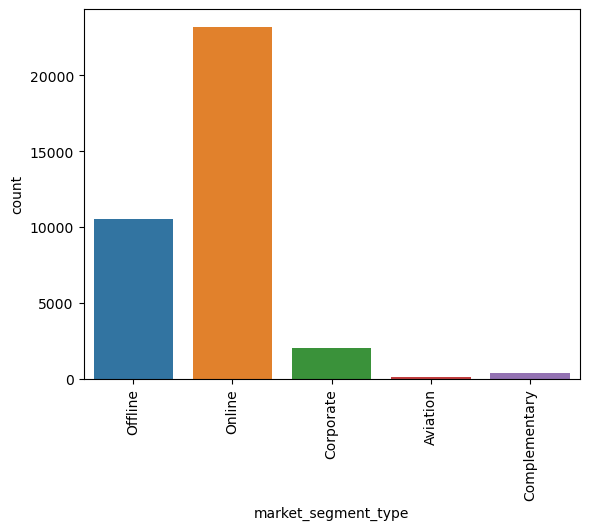

Countplot for repeated_guest
repeated_guest
No     0.974363
Yes    0.025637
Name: proportion, dtype: float64


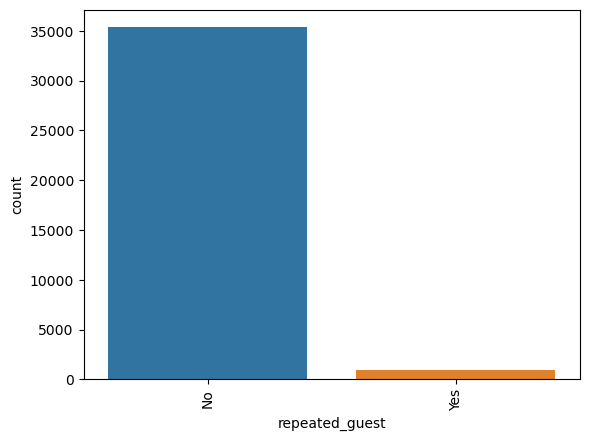

Countplot for no_of_previous_cancellations
no_of_previous_cancellations
0     0.990682
1     0.005458
2     0.001268
3     0.001185
11    0.000689
5     0.000303
4     0.000276
13    0.000110
6     0.000028
Name: proportion, dtype: float64


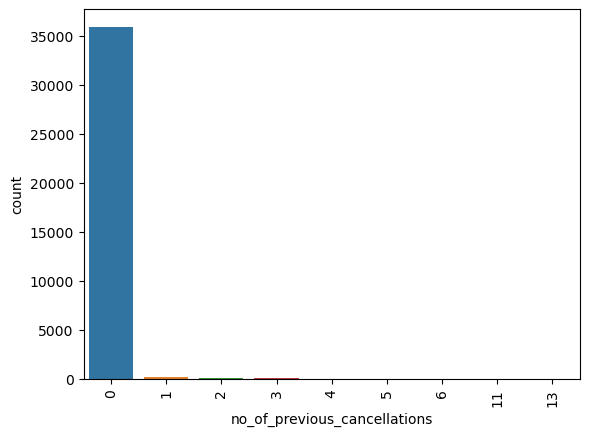

Countplot for no_of_previous_bookings_not_canceled
no_of_previous_bookings_not_canceled
0     0.977615
1     0.006285
2     0.003088
3     0.002205
4     0.001792
5     0.001654
6     0.000992
7     0.000662
8     0.000634
10    0.000524
9     0.000524
11    0.000414
12    0.000331
14    0.000248
15    0.000221
16    0.000193
13    0.000193
18    0.000165
20    0.000165
21    0.000165
17    0.000165
19    0.000165
22    0.000165
25    0.000083
27    0.000083
24    0.000083
23    0.000083
44    0.000055
29    0.000055
48    0.000055
28    0.000055
30    0.000055
32    0.000055
31    0.000055
26    0.000055
46    0.000028
55    0.000028
45    0.000028
57    0.000028
53    0.000028
54    0.000028
58    0.000028
41    0.000028
40    0.000028
43    0.000028
35    0.000028
50    0.000028
56    0.000028
33    0.000028
37    0.000028
42    0.000028
51    0.000028
38    0.000028
34    0.000028
39    0.000028
52    0.000028
49    0.000028
47    0.000028
36    0.000028
Name: proportion, dtype: fl

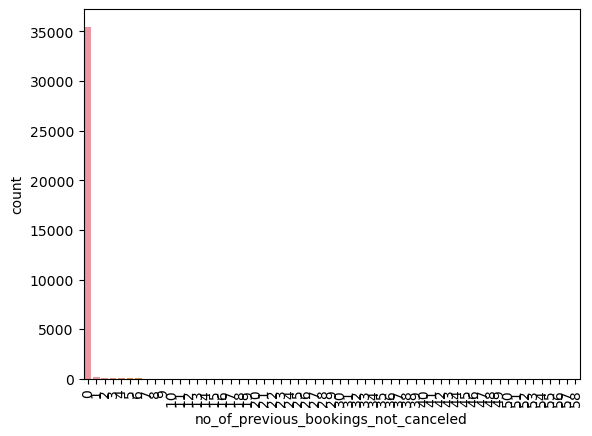

Countplot for no_of_special_requests
no_of_special_requests
0    0.545196
1    0.313522
2    0.120303
3    0.018608
4    0.002150
5    0.000221
Name: proportion, dtype: float64


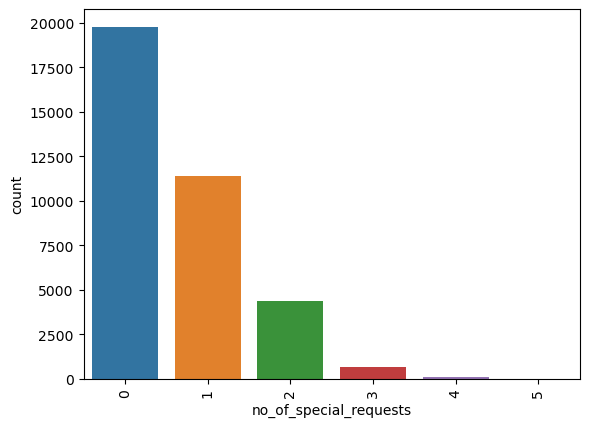

Countplot for booking_status
booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64


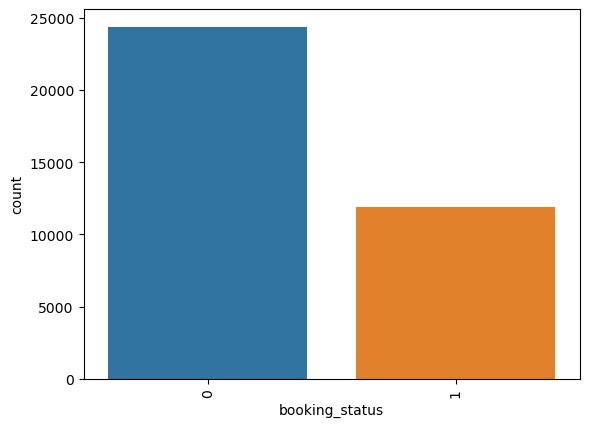

In [252]:
for i in data.loc[:,~data.columns.isin(['Booking_ID','lead_time','avg_price_per_room'])].columns.tolist():
    print('Countplot for', i)
    print(data[i].value_counts(normalize=True))
    countplot(data,i)
    plt.show()

#### Observations

* The highest count for number of adults is 2, so likely pairs
* The highest count for number of children in 0, so likley couples. 
* The week and weekend nights count show that guests stayed mainly during week days
* Room Type and Meal Plan 1 were most popular
* Most people stayed in 2018, and the most popular month is October
* Most people booked Online and are not a repeat guest
* About 67% of the guests did not cancel 
* The most popular month is October with the middle of the months being the time where most people book their stay

### Bivariate Analysis

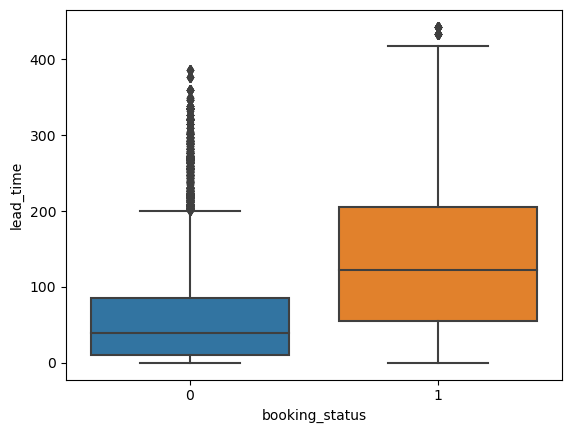

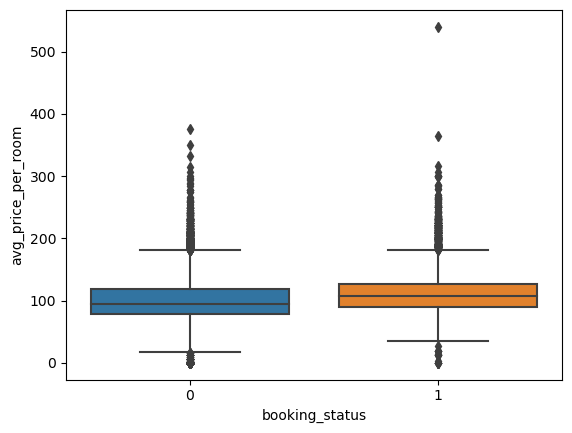

In [253]:
for i in ['lead_time','avg_price_per_room']:
    sns.boxplot(data, x='booking_status', y=i)
    plt.show()

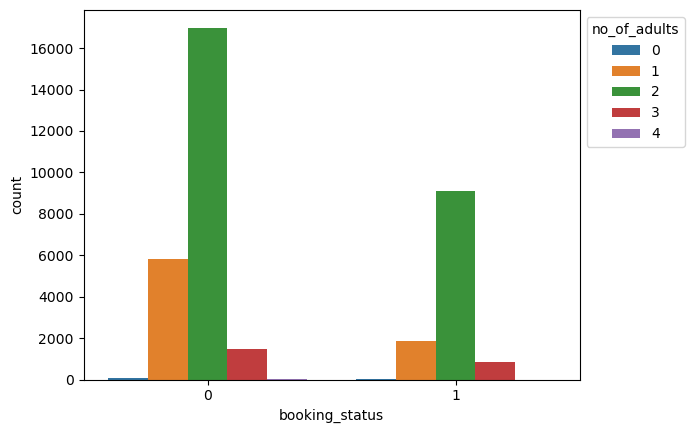

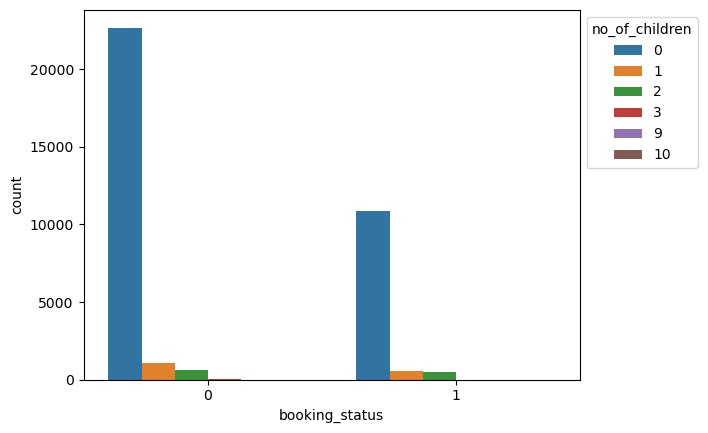

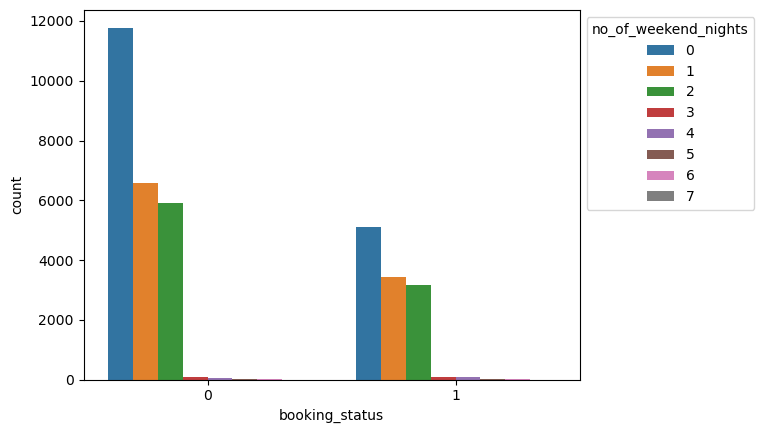

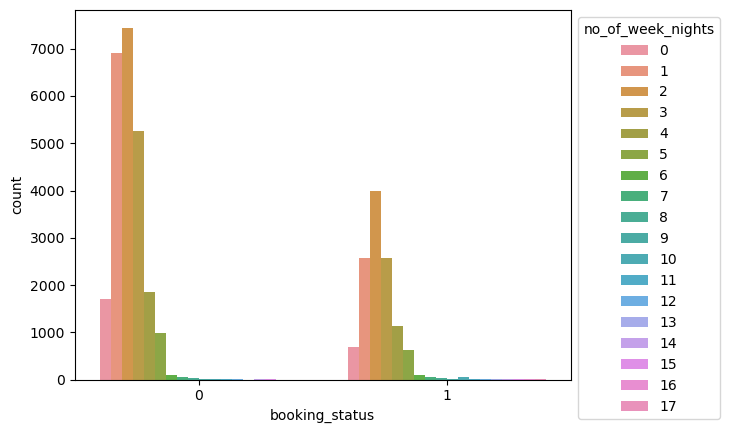

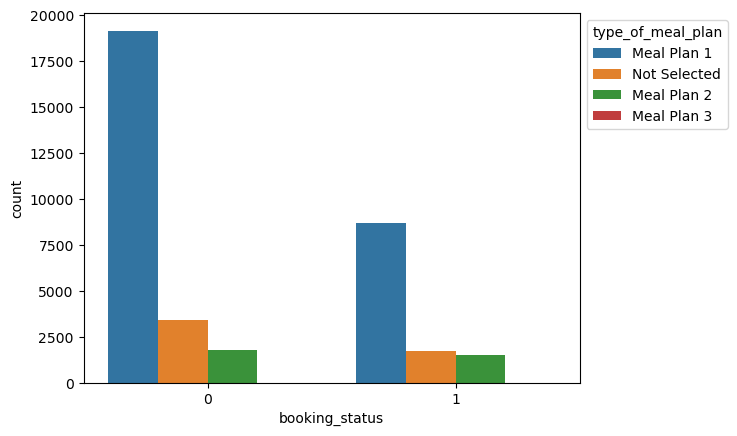

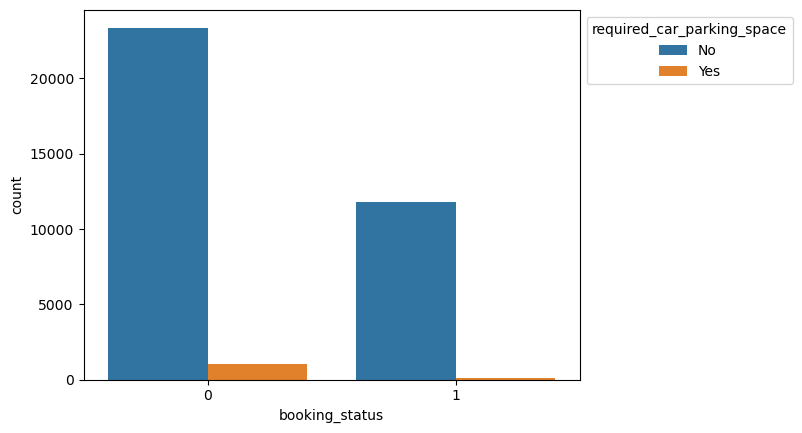

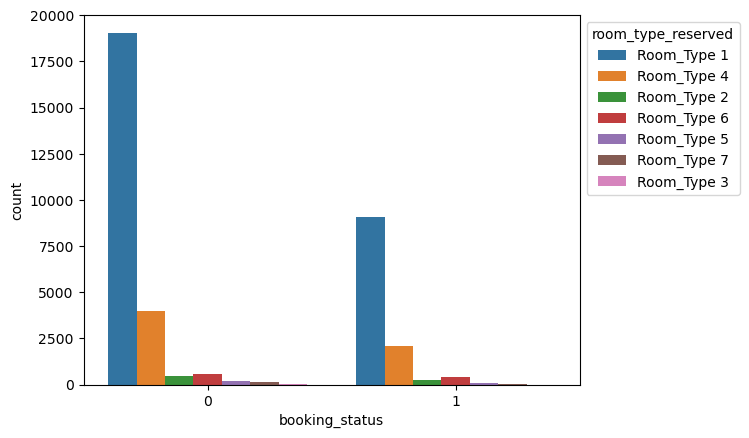

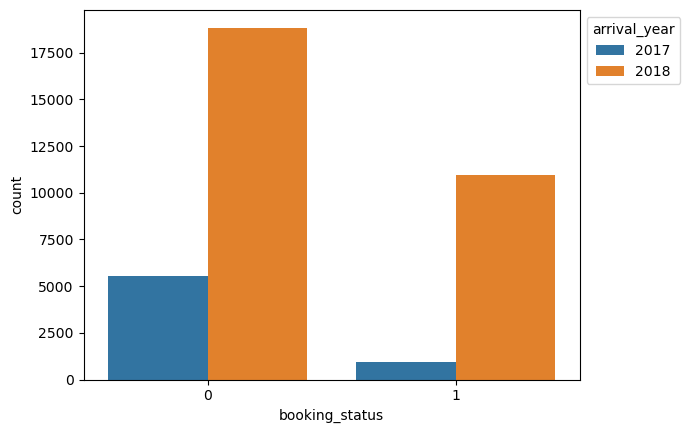

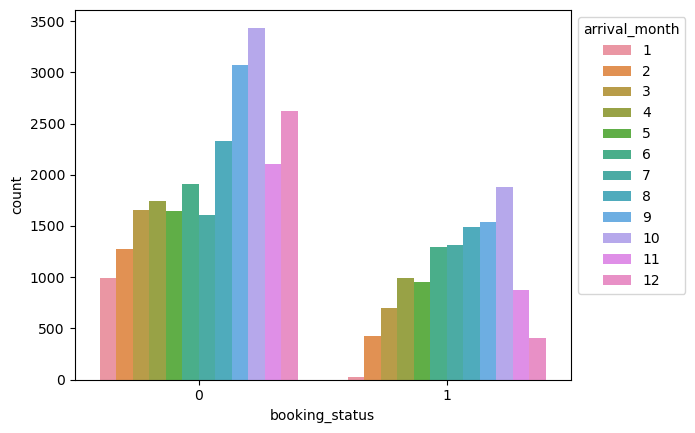

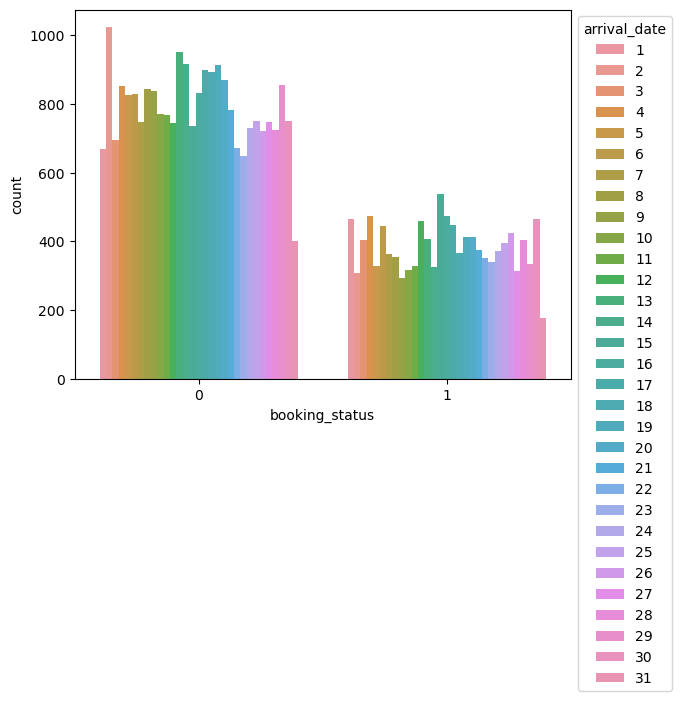

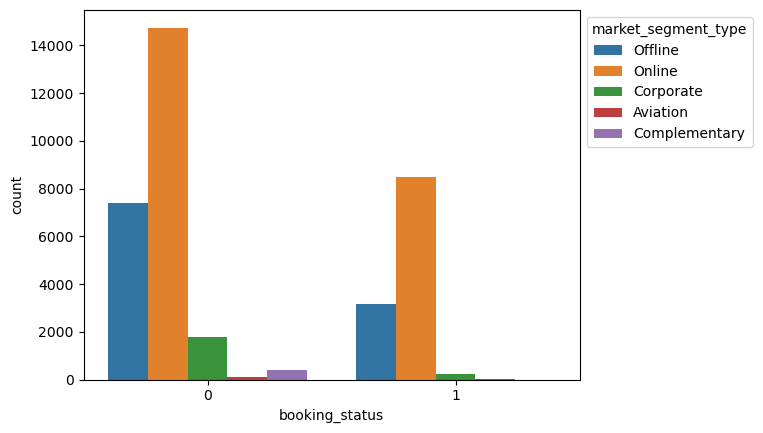

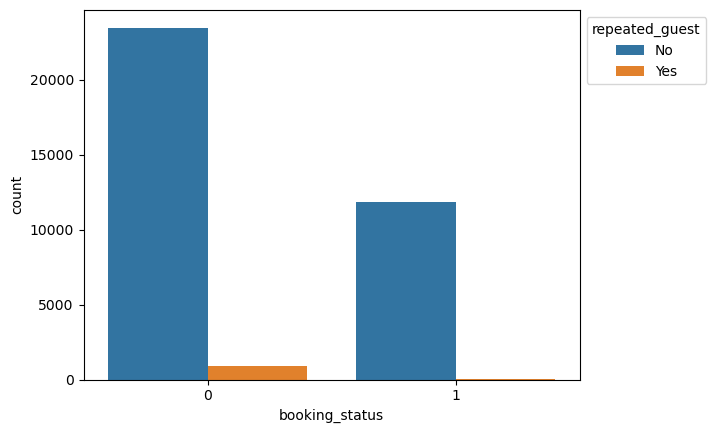

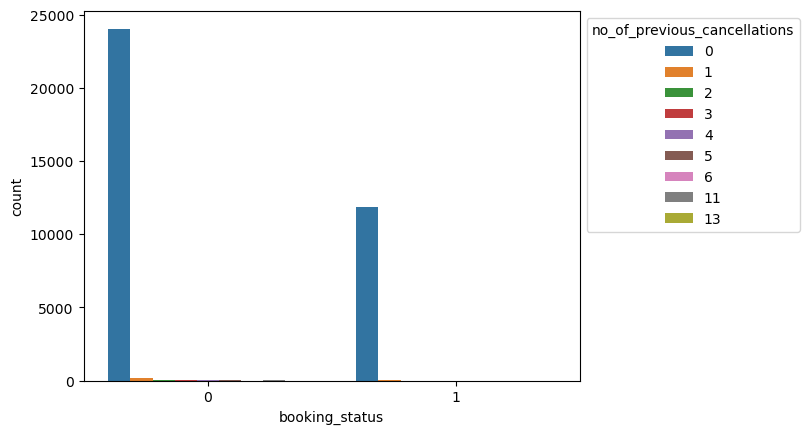

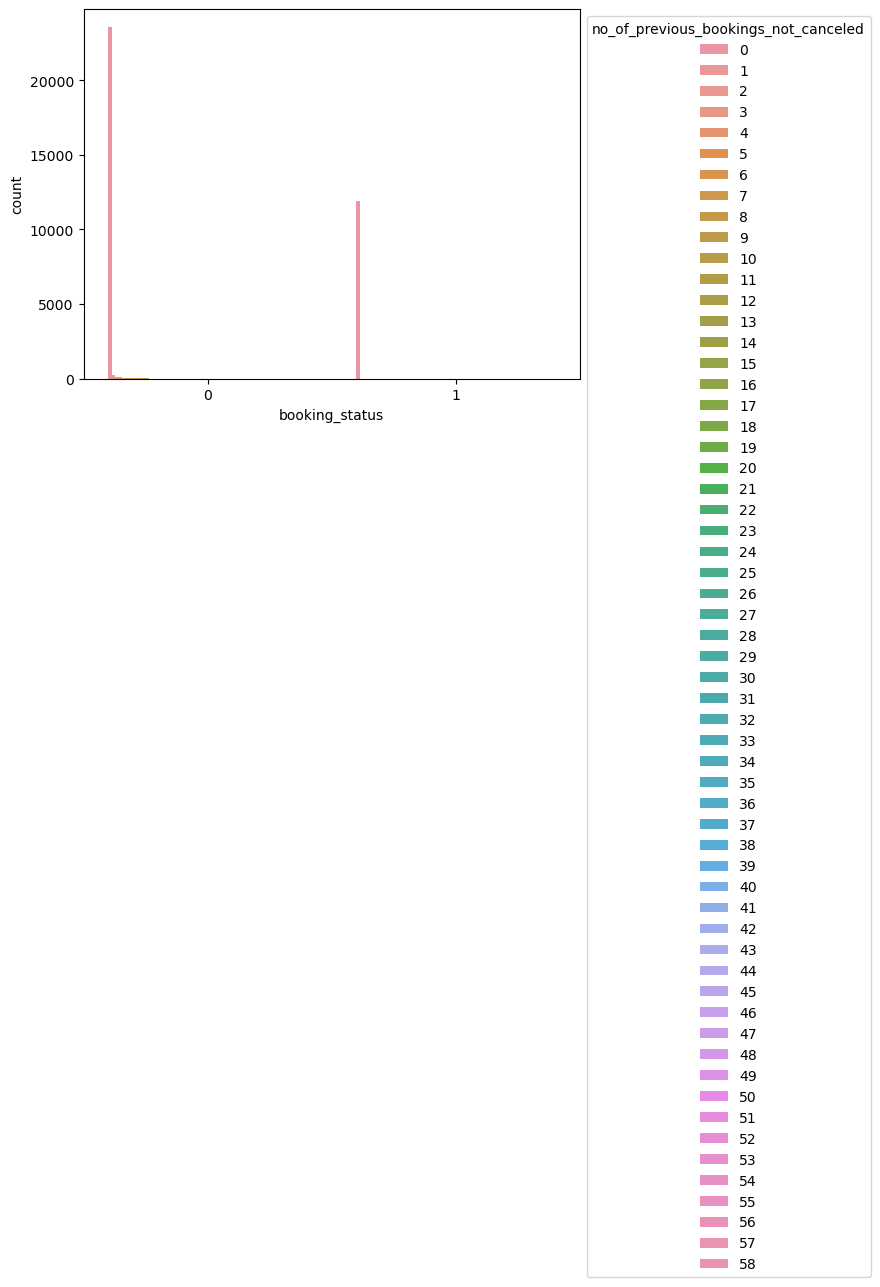

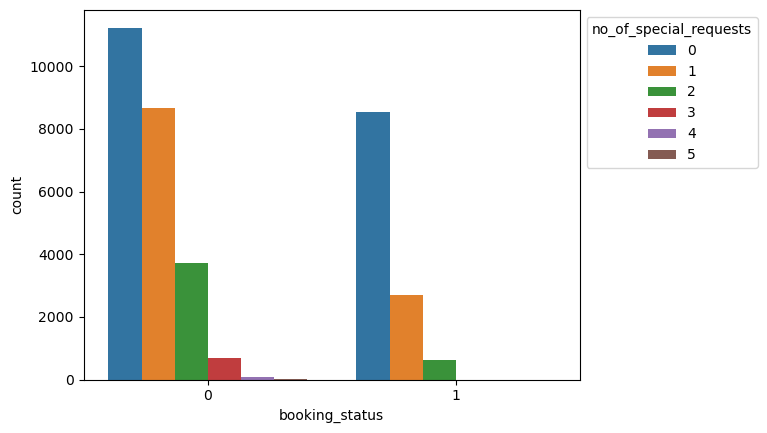

In [254]:
for i in data.drop(['Booking_ID','booking_status','lead_time'],axis=1).select_dtypes(include=['int64','object']).columns.tolist():
    sns.move_legend( sns.countplot(data, x='booking_status', hue=data[i]), "upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Observations

* It seems higher lead time and slightly higher price is indicative of cancelling the booking. 
* Many of the trends are the same for canceled versus not canceled, such as popularity of meal plan and arrival year
* Meal Plan 2 seems to be the most correlated with a high room price, along with the Online market segment and choosing Room Type 7
* An interesting observation is that people rarley cancel a booking made for January

<Axes: >

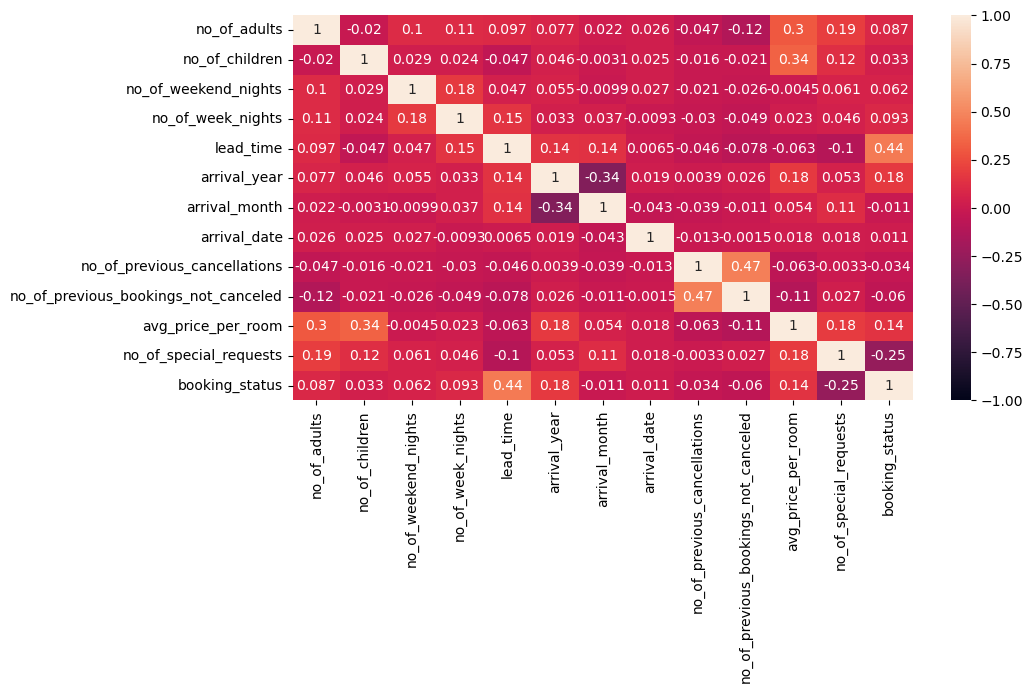

In [256]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include=['float64','int64']).corr(),annot=True,vmin=-1,vmax=1)

The heatmap shows a high positive correlation between lead and time and booking status. Also a positive correlation with price and the number of people in the room. Another is the number of previous cancellations with the number of bookings not canceled. 

### Leading Questions

#### What are the busiest months in the hotel?

In [261]:
data[data['booking_status']==0]['arrival_month'].value_counts(1)

arrival_month
10    0.140918
9     0.125994
12    0.107380
8     0.095326
11    0.086306
6     0.078393
4     0.071382
3     0.067979
5     0.067651
7     0.065847
2     0.052235
1     0.040590
Name: proportion, dtype: float64

The top 3 busiest months for the hotel where bookings are not canceled in decreasing order are October, September, and December. 

#### Which market segment do most of the guests come from?

In [18]:
data['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Most customers come from the Online market segement, with it having 23,214 counts. 

#### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<Axes: xlabel='avg_price_per_room', ylabel='market_segment_type'>

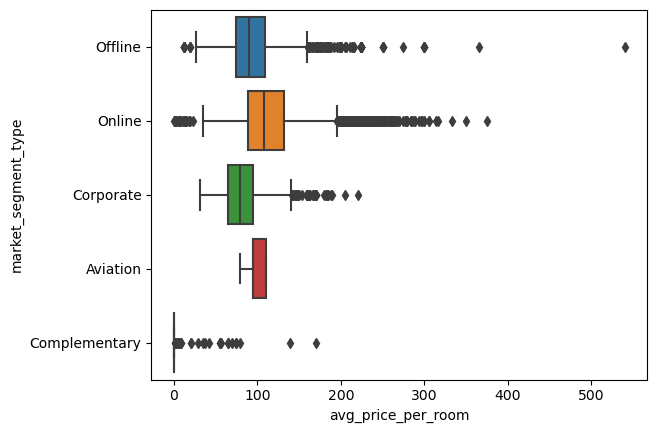

In [168]:
sns.boxplot(data, x='avg_price_per_room', y='market_segment_type')

It seems that the complementary segment has the lowest price. This makes sense as the costs are usually covered. The more expensive segment seems to be online. 

#### What percentage of bookings are canceled?

In [196]:
(data[data['booking_status'] == 1].shape[0] / data.shape[0]) *100

32.76361130254997

Aboout 32.76% of the bookings in the data have a cancelled booking status. 

#### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [200]:
(data[(data['repeated_guest']=='Yes') & (data['booking_status']==1)].shape[0] / data.shape[0]) * 100

0.04410751206064783

Less than 0.05% of the guests that are repeat guests that cancel their stay. 

#### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

<Axes: xlabel='booking_status', ylabel='count'>

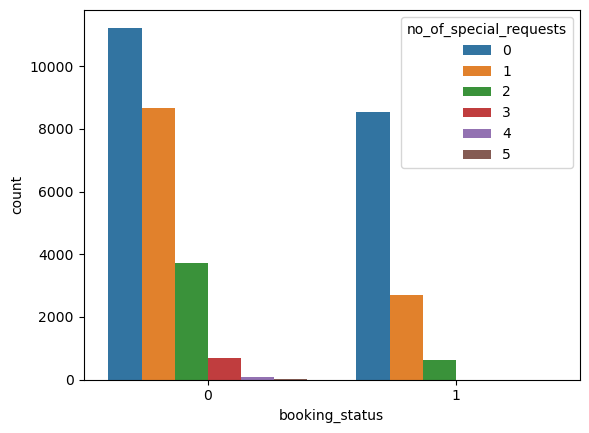

In [216]:
sns.countplot(data,x='booking_status', hue='no_of_special_requests')

It seems that for both types of booking status, the most popular count for special requests is zero. However, it may be interpreted that the more requests made, the less likely the guest cancels, as the "Not Canceled" side has more requests of higher count. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [263]:
for i in data.loc[:,data.columns!='Booking_ID'].select_dtypes(include='object').columns.tolist():
    print(data[i].value_counts())

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
required_car_parking_space
No     35151
Yes     1124
Name: count, dtype: int64
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
repeated_guest
No     35345
Yes      930
Name: count, dtype: int64


In [264]:
data[data["avg_price_per_room"] == 0]['market_segment_type'].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [265]:
# Replacing 0 in non-Complementary rows with NaN
data.loc[(data['avg_price_per_room'] == 0) & (data['market_segment_type'] == 'Online'),'avg_price_per_room'] = np.nan

In [266]:
data.isnull().sum()

Booking_ID                                0
no_of_adults                              0
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                         0
required_car_parking_space                0
room_type_reserved                        0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                      191
no_of_special_requests                    0
booking_status                            0
dtype: int64

In [267]:
#Transforming NaN into the median grouby market type
data['avg_price_per_room'] = data['avg_price_per_room'].fillna(
value = data.groupby('market_segment_type')['avg_price_per_room'].transform('median')
)

In [24]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

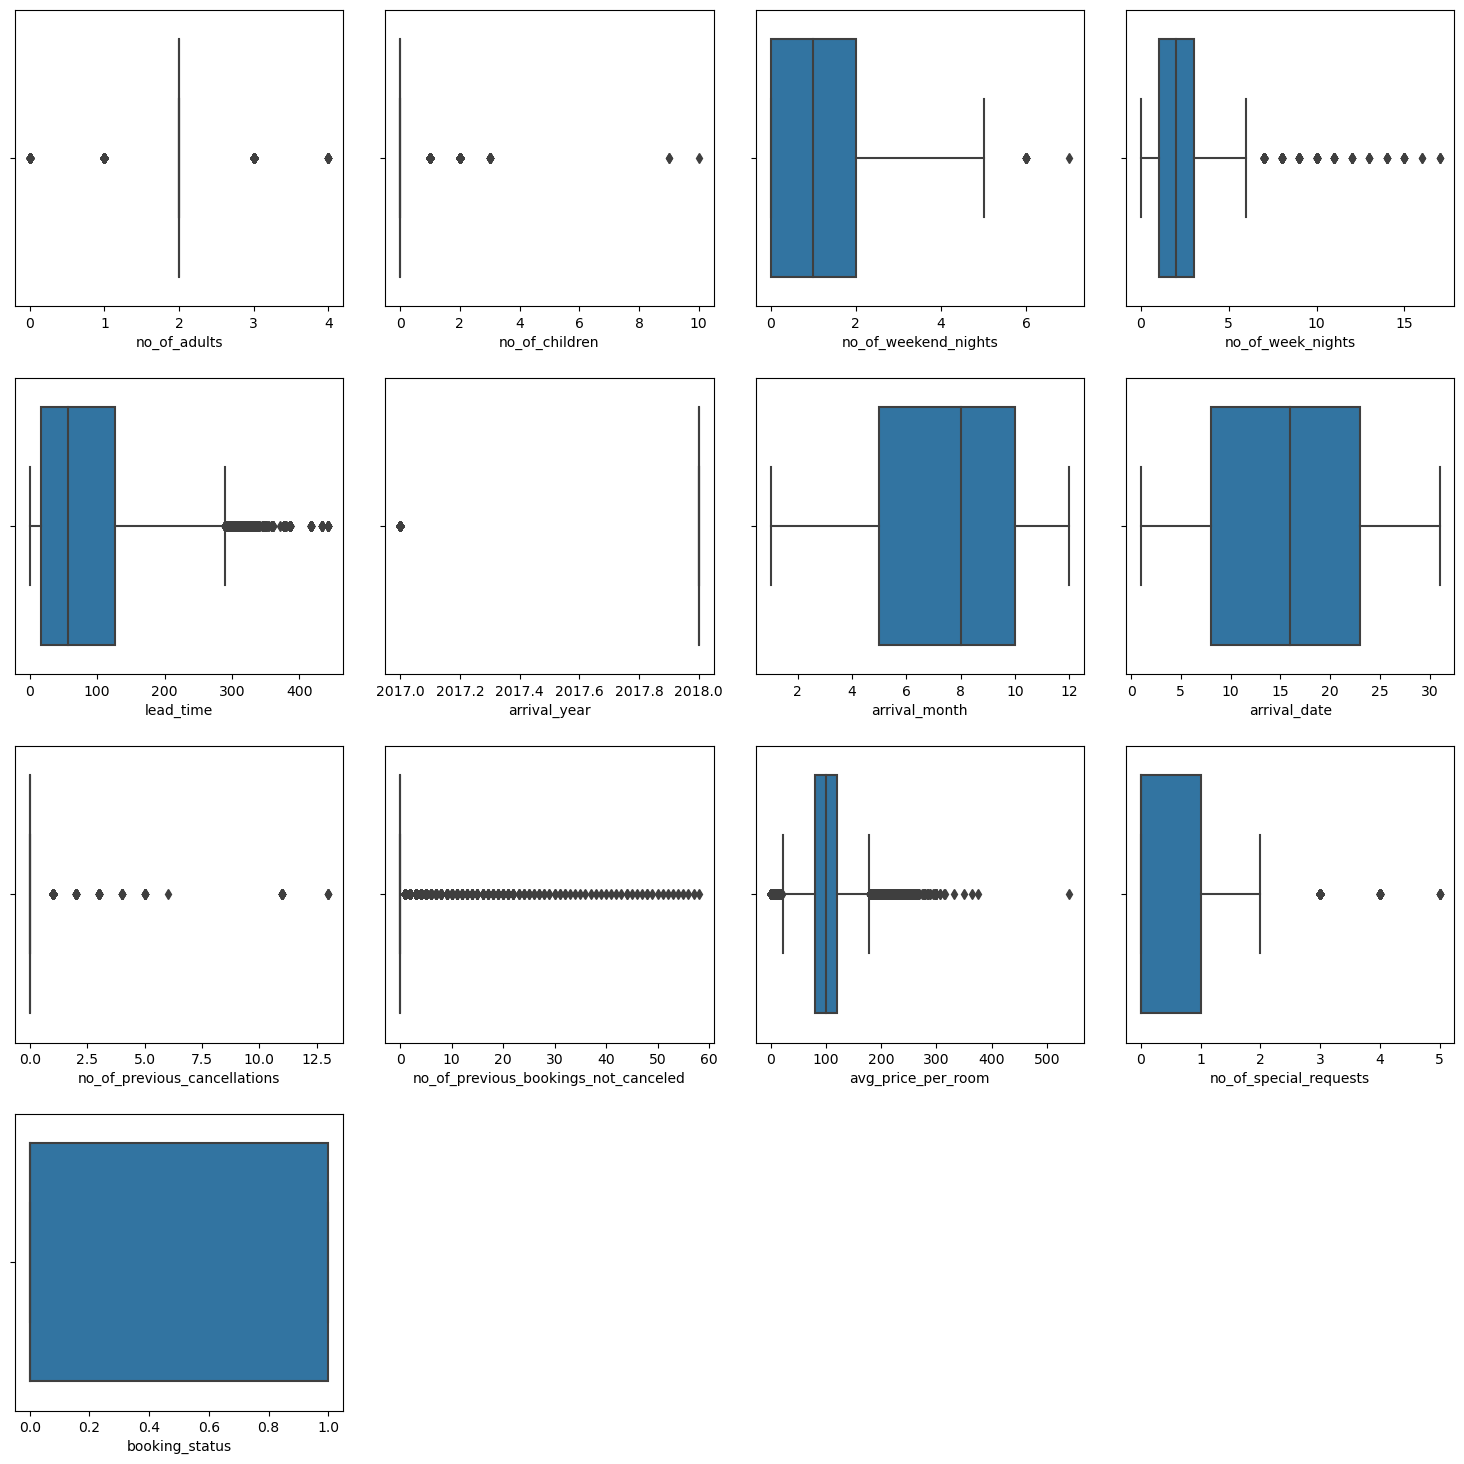

In [25]:
numeric_cols = data.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(15,15))

for i, x in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data, x=x)
    plt.tight_layout(pad=2)
        
plt.show()

There are outliers in the data, however the data makes sense, so no need for changes. 

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

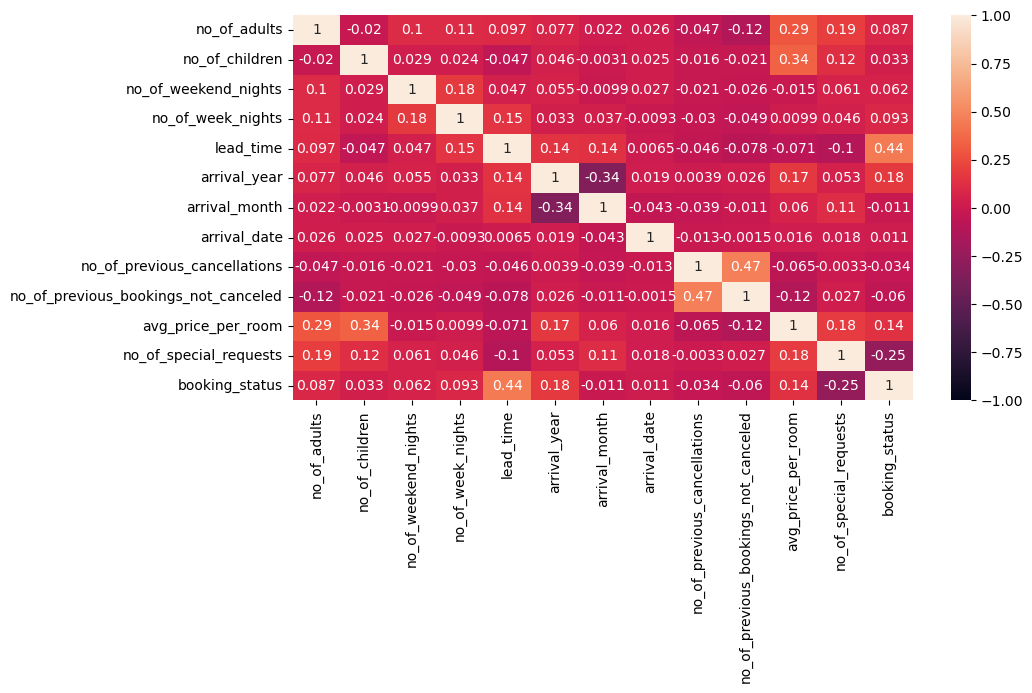

In [268]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include=['float64','int64']).corr(),annot=True,vmin=-1,vmax=1)

The heatmap has not significantly changed, so the changes made are valid

### Modeling Preparation

In [270]:
X = data.drop(['booking_status','Booking_ID'],axis=1)
X = sm.add_constant(X)
X = pd.get_dummies(X,drop_first=True)

y = data['booking_status']

display(X.head())
y.head().to_frame()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
0,1.0,2,0,1,2,224,2017,10,2,0,...,False,False,False,False,False,False,False,True,False,False
1,1.0,2,0,2,3,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,True,False
2,1.0,1,0,2,1,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,True,False
3,1.0,2,0,0,2,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,True,False
4,1.0,2,0,1,1,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,True,False


,booking_status
0,0
1,0
2,1
3,1
4,1


In [271]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, test_size = 0.30, random_state = 1, stratify=y
)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [272]:
vif_series = pd.Series(
    [vif(xtrain.astype(float).values,i) for i in range(xtrain.shape[1])],
    index = xtrain.columns,
    dtype=float
)
vif_series = round(vif_series.drop('const').sort_values(ascending=False),4)
vif_series

market_segment_type_Online              69.4928
market_segment_type_Offline             62.5140
market_segment_type_Corporate           16.6362
market_segment_type_Complementary        4.3726
avg_price_per_room                       2.1561
no_of_children                           2.0068
room_type_reserved_Room_Type 6           2.0061
repeated_guest_Yes                       1.7505
no_of_previous_bookings_not_canceled     1.5709
arrival_year                             1.4293
lead_time                                1.4086
room_type_reserved_Room_Type 4           1.3625
no_of_adults                             1.3386
no_of_previous_cancellations             1.3220
type_of_meal_plan_Not Selected           1.2869
type_of_meal_plan_Meal Plan 2            1.2850
arrival_month                            1.2828
no_of_special_requests                   1.2467
room_type_reserved_Room_Type 7           1.0972
no_of_week_nights                        1.0970
room_type_reserved_Room_Type 2          

In [273]:
vifcopy = vif_series.copy()
xtraincopy = xtrain.copy()

for i in vifcopy[vifcopy>=5].index.tolist():
        xtraincopy = xtraincopy.drop(i,axis=1)
        viftemp = pd.Series(
    [vif(xtraincopy.astype(float).values,i) for i in range(xtraincopy.shape[1])],
    index = xtraincopy.columns,
    dtype=float)
        print('High VIF columns after dropping',i)
        print(viftemp[viftemp>=5])
        print('')

High VIF columns after dropping market_segment_type_Online
const    3.939401e+07
dtype: float64

High VIF columns after dropping market_segment_type_Offline
const    3.931422e+07
dtype: float64

High VIF columns after dropping market_segment_type_Corporate
const    3.928171e+07
dtype: float64



In [274]:
xtrain1 = xtrain.drop('market_segment_type_Online',axis=1)

final_vif= pd.Series(
    [vif(xtrain1.astype(float).values,i) for i in range(xtrain1.shape[1])],
    index = xtrain1.columns,
    dtype=float)
final_vif = round(final_vif.drop('const').sort_values(ascending=False),3)
final_vif

avg_price_per_room                      2.155
no_of_children                          2.006
room_type_reserved_Room_Type 6          2.006
repeated_guest_Yes                      1.747
market_segment_type_Offline             1.634
no_of_previous_bookings_not_canceled    1.571
market_segment_type_Corporate           1.543
arrival_year                            1.426
lead_time                               1.404
market_segment_type_Complementary       1.360
room_type_reserved_Room_Type 4          1.358
no_of_adults                            1.322
no_of_previous_cancellations            1.322
type_of_meal_plan_Not Selected          1.285
type_of_meal_plan_Meal Plan 2           1.285
arrival_month                           1.282
no_of_special_requests                  1.242
room_type_reserved_Room_Type 7          1.097
no_of_week_nights                       1.096
room_type_reserved_Room_Type 2          1.095
no_of_weekend_nights                    1.070
required_car_parking_space_Yes    

In [275]:
xtrain1 = xtrain1.astype(float)
ytrain = ytrain.astype(float)

## Building a Logistic Regression model

In [276]:
lg = sm.Logit(ytrain.astype(float), xtrain1.astype(float)).fit()

         Current function value: 0.424113
         Iterations: 35


In [277]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 06 Apr 2024   Pseudo R-squ.:                  0.3294
Time:                        23:09:05   Log-Likelihood:                -10769.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -964.2816    120.976     -7.971      0.000   -1201.391    -727.173
no_of_adults                             0.0568      

## Model performance evaluation

In [278]:
trainpred = lg.predict(xtrain1.astype(float)) > 0.5
trainpred = np.round(trainpred)

Text(50.722222222222214, 0.5, 'Actual Values')

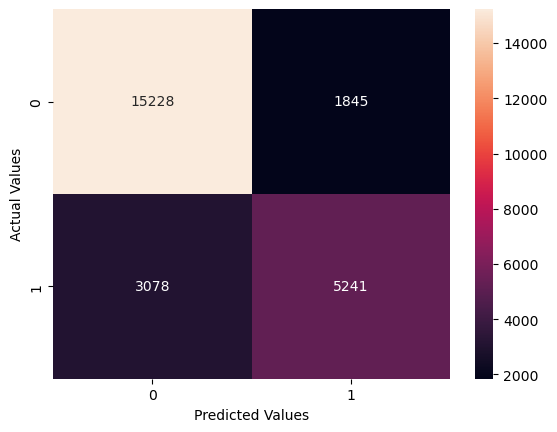

In [279]:
cm = confusion_matrix(ytrain, trainpred)
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [280]:
def model_perf (model, ind, dep, threshold = 0.5):
    model_pred = model.predict(ind) > threshold
    model_pred = model_pred.astype(float)
    
    accuracy = accuracy_score(dep, model_pred)
    recall = recall_score(dep, model_pred)
    precision = precision_score (dep, model_pred)
    f1 = f1_score(dep, model_pred)
    
    model_perf_df = pd.DataFrame(
        {'Accuracy': accuracy,
         'Recall Score' : recall,
         'Precision' : precision,
         'F1 Score' : f1
        }, index = [0]
    )
    model_perf_df = round(model_perf_df,3)
    return model_perf_df
    

In [281]:
model_perf(lg, xtrain1, ytrain)

,Accuracy,Recall Score,Precision,F1 Score
0,0.806,0.63,0.74,0.68


### P-Value Correction & Evaluation

In [282]:
pval_cols = xtrain1.columns.tolist()
col_dropped = []

while len(pval_cols) > 0:
    pval_xtrain = xtrain1[pval_cols]
    
    pval_model = sm.Logit(ytrain, pval_xtrain.astype(float)).fit()
    
    max_pval = pval_model.pvalues.max()
    max_pval_id = pval_model.pvalues.idxmax()
    
    if max_pval>0.05:
        pval_cols.remove(max_pval_id)
        col_dropped.append(max_pval_id)
    else:
        break

final_cols = pval_cols
print(final_cols)
col_dropped

         Current function value: 0.424113
         Iterations: 35
         Current function value: 0.424162
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.424498
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.424502
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.424669
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.424714
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.424764
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.424805
         Iterations 11
['const', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'r

['type_of_meal_plan_Meal Plan 3',
 'market_segment_type_Complementary',
 'room_type_reserved_Room_Type 3',
 'no_of_previous_bookings_not_canceled',
 'arrival_date',
 'no_of_adults',
 'no_of_children']

In [283]:
xtrain_final = xtrain1[final_cols].astype(float)

lg_final = sm.Logit(ytrain, xtrain_final).fit()
print(lg_final.summary())

Optimization terminated successfully.
         Current function value: 0.424805
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 06 Apr 2024   Pseudo R-squ.:                  0.3284
Time:                        23:09:26   Log-Likelihood:                -10787.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -944.7420    120.727     -7.825    

### Final Training Performance

In [284]:
trainpred_final = lg_final.predict(xtrain_final) > 0.5

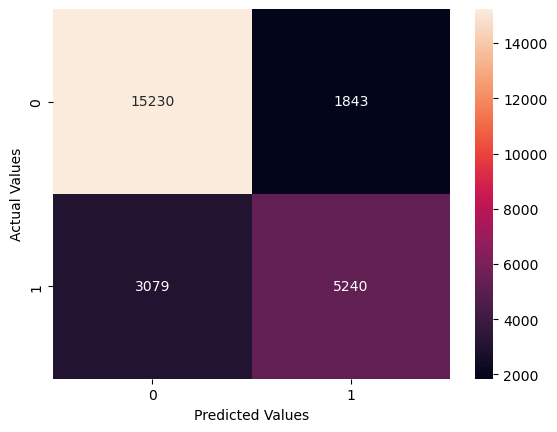

In [285]:
cm2 = confusion_matrix(ytrain, trainpred_final)
sns.heatmap(cm2, annot=True, fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [286]:
print('Final Train Performance:')
model_perf(lg_final, xtrain_final, ytrain)

Final Train Performance:


,Accuracy,Recall Score,Precision,F1 Score
0,0.806,0.63,0.74,0.68


### Testing Performance

In [287]:
xtest_final = xtest[xtrain_final.columns.tolist()]

In [288]:
testpred = lg_final.predict(xtest_final.astype(float)) > 0.5

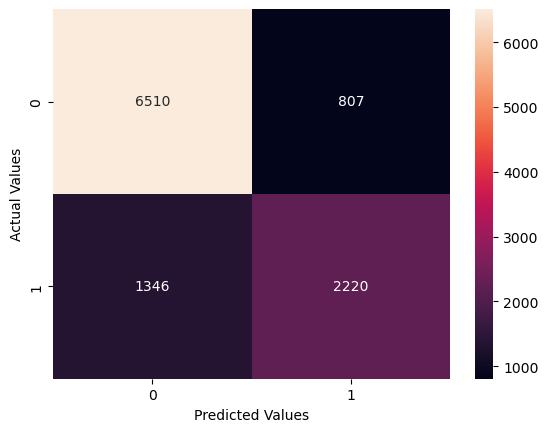

In [289]:
cm_test = confusion_matrix(ytest.astype(float), testpred)
sns.heatmap(cm_test, annot=True, fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [290]:
print('Test Performance')
model_perf(lg_final, xtest_final.astype(float), ytest.astype(float))

Test Performance


,Accuracy,Recall Score,Precision,F1 Score
0,0.802,0.623,0.733,0.673


The Training performance for the model after changing it did not significantly change, so the changes are valid. 

### Coefficients 

In [293]:
odds = np.exp(lg_final.params)
odds_perc_change = (odds-1) * 100

odds_table = pd.DataFrame(
    {'Odds' : odds,
     'Odds Percent Change': odds_perc_change,
    
    }, index = xtrain_final.columns
)

## Final Model Summary

In [296]:
lg_final.params.sort_values(ascending =False)

arrival_year                        0.466875
no_of_previous_cancellations        0.289025
type_of_meal_plan_Not Selected      0.212799
type_of_meal_plan_Meal Plan 2       0.155005
no_of_weekend_nights                0.152874
no_of_week_nights                   0.038729
avg_price_per_room                  0.018466
lead_time                           0.015816
arrival_month                      -0.048039
room_type_reserved_Room_Type 4     -0.243752
room_type_reserved_Room_Type 2     -0.373037
room_type_reserved_Room_Type 5     -0.667548
room_type_reserved_Room_Type 6     -0.680741
market_segment_type_Corporate      -0.851469
room_type_reserved_Room_Type 7     -1.251922
no_of_special_requests             -1.474032
required_car_parking_space_Yes     -1.594415
market_segment_type_Offline        -1.743590
repeated_guest_Yes                 -3.080812
const                            -944.742029
dtype: float64

The positive coefficients mean that an increase in a unit of the variable will lead to a higher likelihood of cancellation, while the opposite is true for negative coefficients.  

In [297]:
odds_table.sort_values(by='Odds',ascending=False)

,Odds,Odds Percent Change
arrival_year,1.595002,59.500177
no_of_previous_cancellations,1.335125,33.512534
type_of_meal_plan_Not Selected,1.237135,23.713536
type_of_meal_plan_Meal Plan 2,1.167663,16.766334
no_of_weekend_nights,1.165178,16.517788
no_of_week_nights,1.039489,3.948904
avg_price_per_room,1.018638,1.863773
lead_time,1.015942,1.594209
arrival_month,0.953097,-4.690321
room_type_reserved_Room_Type 4,0.783682,-21.631812


The above table displays the odds and odds percent change with respect to the booking status should the variable change one unit. 

For example, a one unit change in arrival year, meaning the guest arrives in 2018, leads too a 59.5% increased chance that the booking will be canceled. Another is if a customer chose meal plan 2, there is a 16.8% increase to the likelihood of cancellation. 

On the other hand, a unit change to the number of special requests leads to a 77% decrease in likelihood of cancellation, and if the customer is a repeated guest, there is a 95.4% chance that the guest will not cancel. 

## Building a Decision Tree model

In [298]:
def model_perf_tree (model, ind, dep):
    
    model_pred = model.predict(ind)
    model_pred = model_pred.astype(float)
    
    accuracy = accuracy_score(dep, model_pred)
    recall = recall_score(dep, model_pred)
    precision = precision_score (dep, model_pred)
    f1 = f1_score(dep, model_pred)
    
    model_perf_df = pd.DataFrame(
        {'Accuracy': accuracy,
         'Recall Score' : recall,
         'Precision' : precision,
         'F1 Score' : f1
        }, index = [0]
    )
    model_perf_df = round(model_perf_df,3)
    return model_perf_df

In [299]:
def cm_tree (model,ind,dep):
    tree_pred = model.predict(ind)
    
    cm_tree = confusion_matrix(dep, tree_pred)
    sns.heatmap(cm_tree, annot=True, fmt='g')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [300]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dtree.fit(xtrain_final, ytrain)

DecisionTreeClassifier(random_state=1)

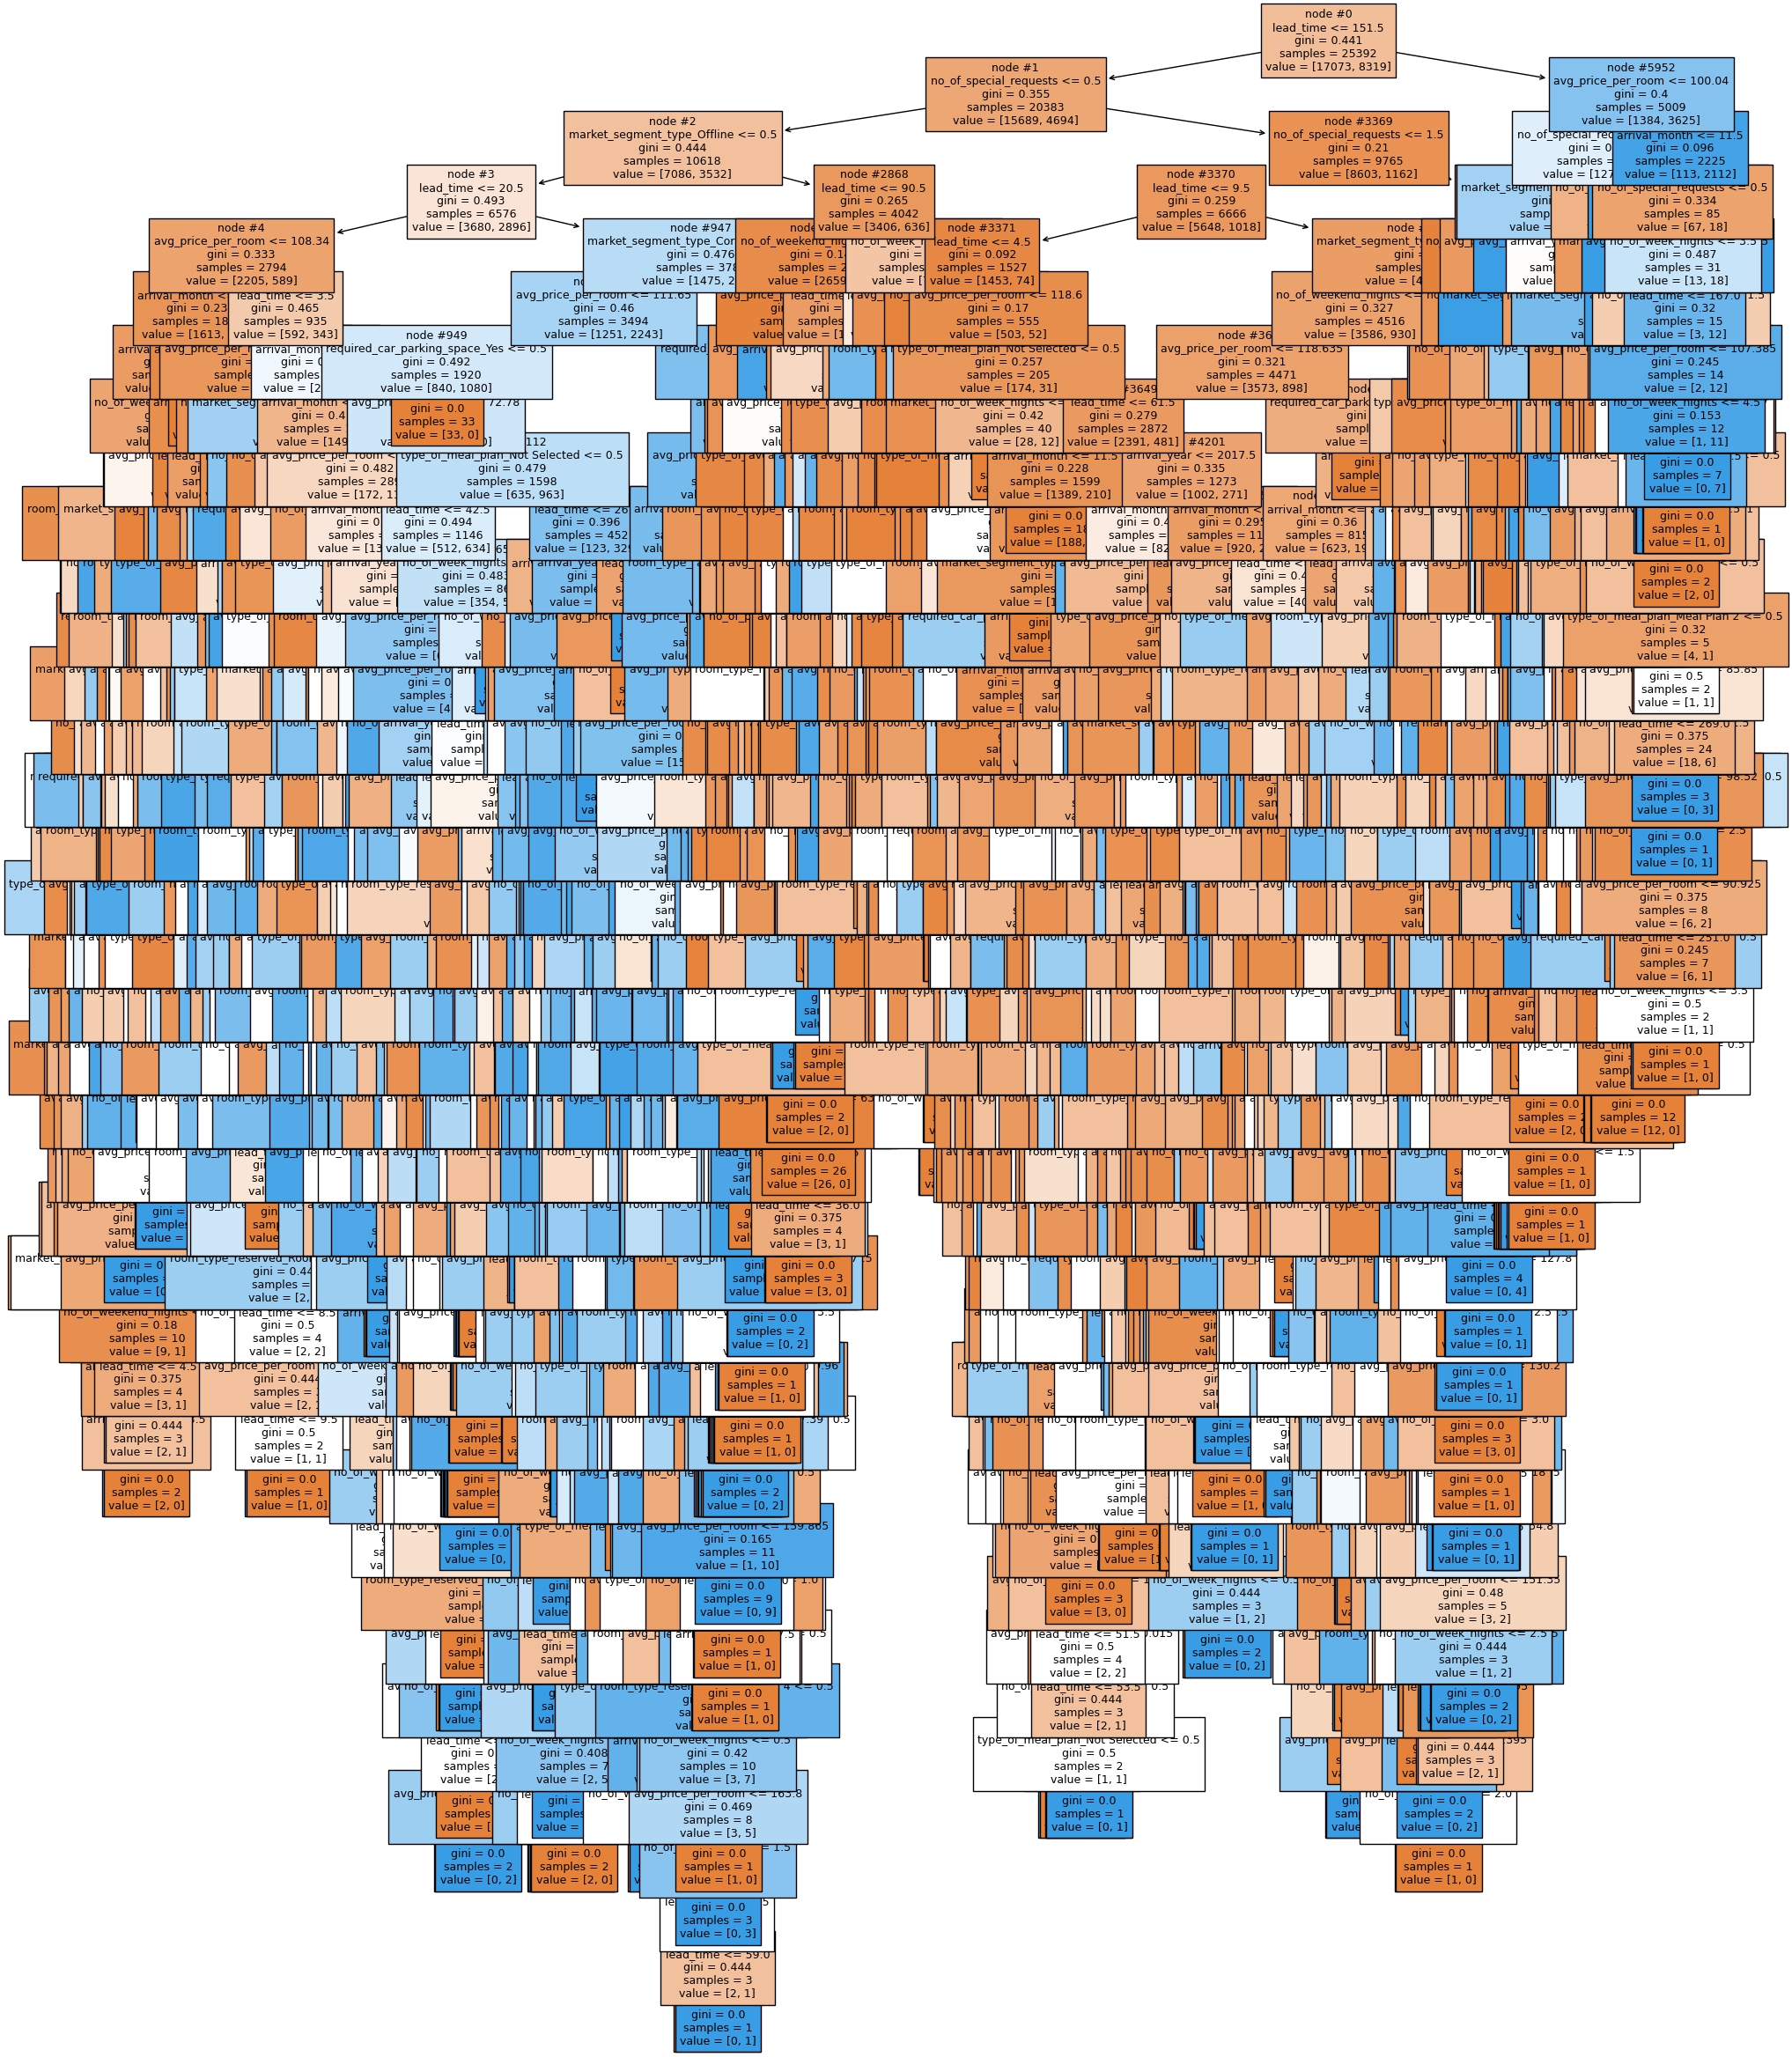

In [301]:
plt.figure(figsize=(23,30))
tree.plot_tree(dtree,feature_names = xtrain_final.columns.tolist(),filled=True,fontsize=9, node_ids=True)
plt.show()

In [302]:
print('Performance on Training Set:')
display(model_perf_tree(dtree,xtrain_final,ytrain))
print('Performance on Testing Set')
model_perf_tree(dtree, xtest_final, ytest)

Performance on Training Set:


,Accuracy,Recall Score,Precision,F1 Score
0,0.993,0.984,0.995,0.989


Performance on Testing Set


,Accuracy,Recall Score,Precision,F1 Score
0,0.871,0.805,0.802,0.804


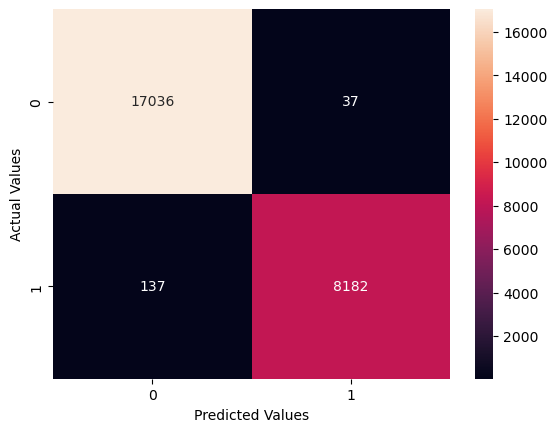

In [303]:
cm_tree(dtree, xtrain_final,ytrain)

## Do we need to prune the tree?

Yes, the performance of the tree is not bad, but the tree itself has too many leaf nodes and is hard to interpret and comprehend. 

### Pre-Pruning (Hyperparameters)

In [56]:
classifier = DecisionTreeClassifier(random_state=1)

parameters = {
    'max_depth' : np.arange(1,15),
    'min_samples_leaf' : [1,2,3,5,7,10,12,15,20],
    'max_leaf_nodes' : [2,3,4,5,7,8,10],
    'min_impurity_decrease' : [0.0001,0.001,0.01,0.1]
}

scorer = metrics.make_scorer(metrics.recall_score)

grid = gridsearch(classifier, parameters, scoring=scorer, cv = 5)
grid = grid.fit(xtrain_final, ytrain)

estimator = grid.best_estimator_
estimator.fit(xtrain_final, ytrain)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7,
                       min_impurity_decrease=0.01, random_state=1)

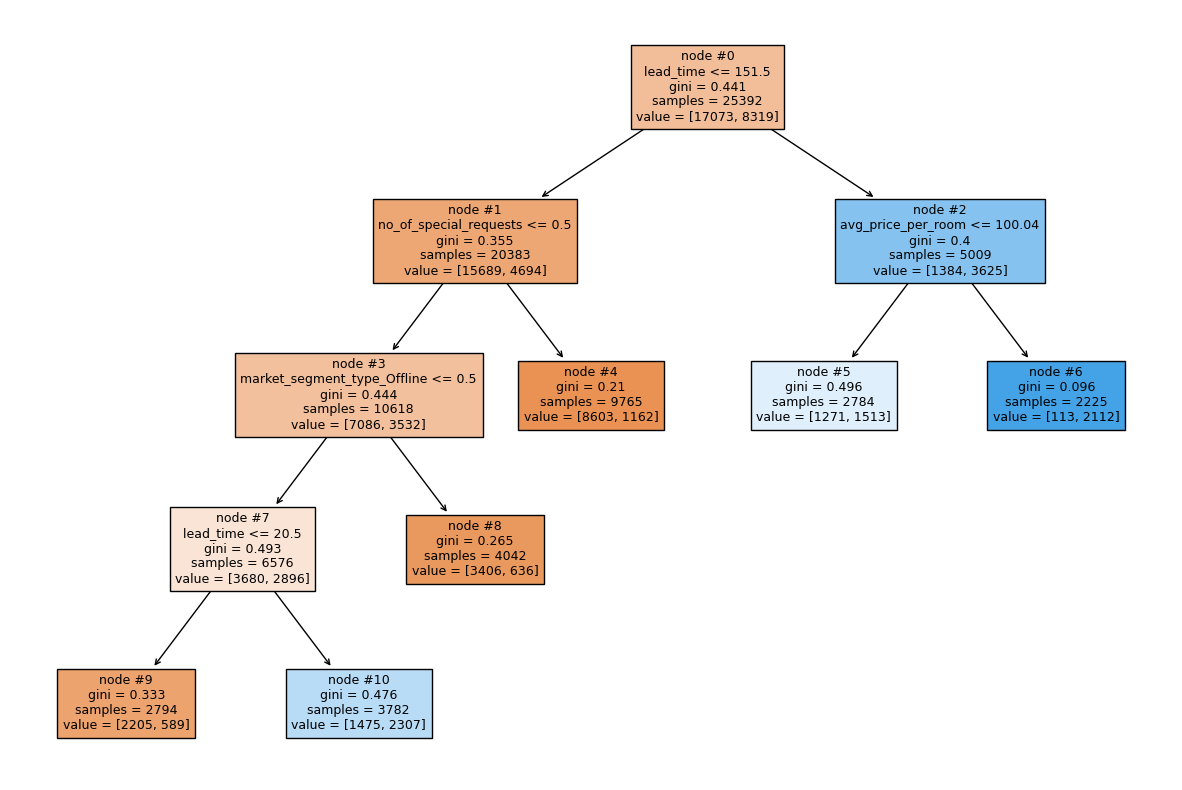

In [304]:
plt.figure(figsize=(15,10))
tree.plot_tree(estimator,feature_names = xtrain_final.columns.tolist(),filled=True,fontsize=9, node_ids=True)
plt.show()

Pretuned Model Training Matrix:


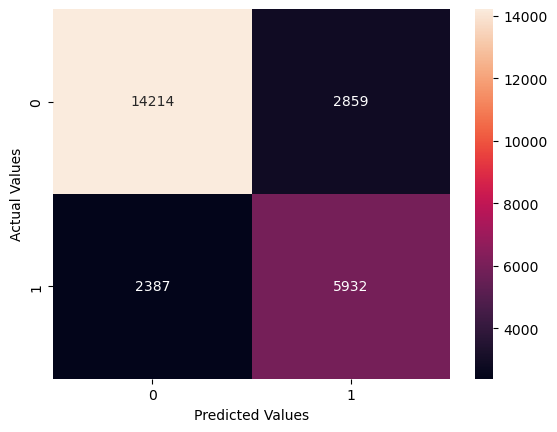

In [58]:
print('Pretuned Model Training Matrix:')
cm_tree(estimator, xtrain_final, ytrain)

In [59]:
print('Pretuned Model Training Performance:')
model_perf_tree(estimator, xtrain_final, ytrain)

Pretuned Model Training Performance:


,Accuracy,Recall Score,Precision,F1 Score
0,0.793,0.713,0.675,0.693


Pretuned Model Testing Matrix:


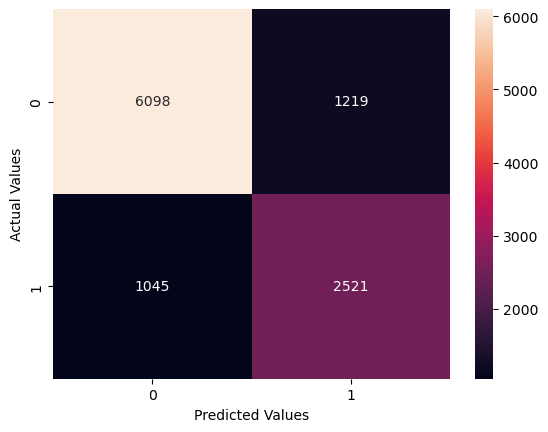

In [60]:
print('Pretuned Model Testing Matrix:')
cm_tree(estimator, xtest_final, ytest)

In [61]:
print('Pretuned Model Testing Performance:')
model_perf_tree(estimator, xtest_final, ytest)

Pretuned Model Testing Performance:


,Accuracy,Recall Score,Precision,F1 Score
0,0.792,0.707,0.674,0.69


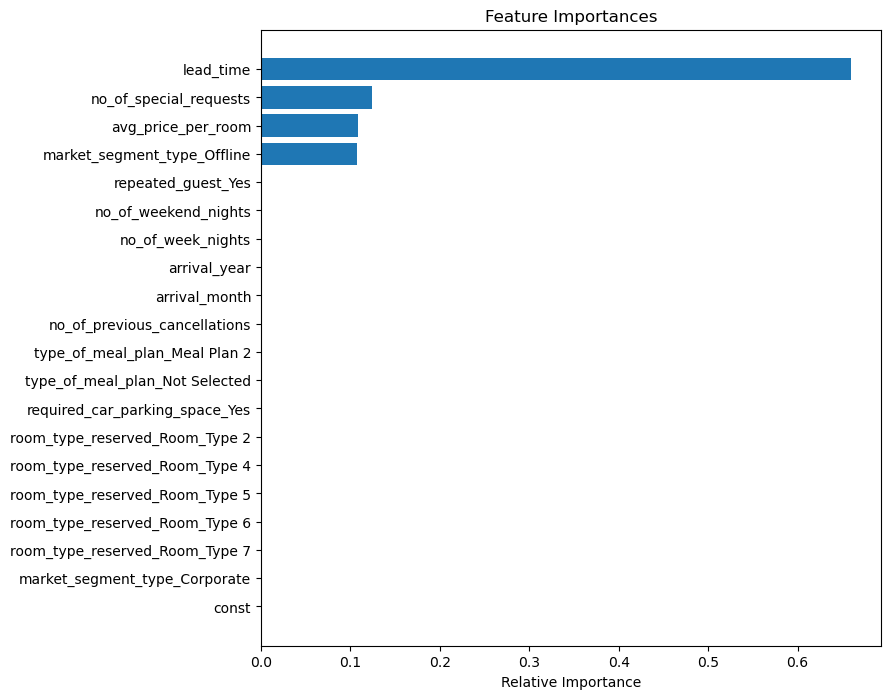

In [76]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [xtrain_final.columns.tolist()[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The accuracy and recall scores of the train and test set are similar, but the recall is less than the original tree. So this may affect whether this is the best model for us.

### Post-Pruning

In [310]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(xtrain_final, ytrain)
ccp, impurities = abs(path['ccp_alphas']), path['impurities']
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.009761
1,-8.131516e-20,0.009761
2,2.926260e-20,0.009761
3,2.926260e-20,0.009761
4,2.926260e-20,0.009761
...,...,...
1709,8.542012e-03,0.335143
1710,9.074926e-03,0.344218
1711,2.168544e-02,0.387589
1712,3.035184e-02,0.417941


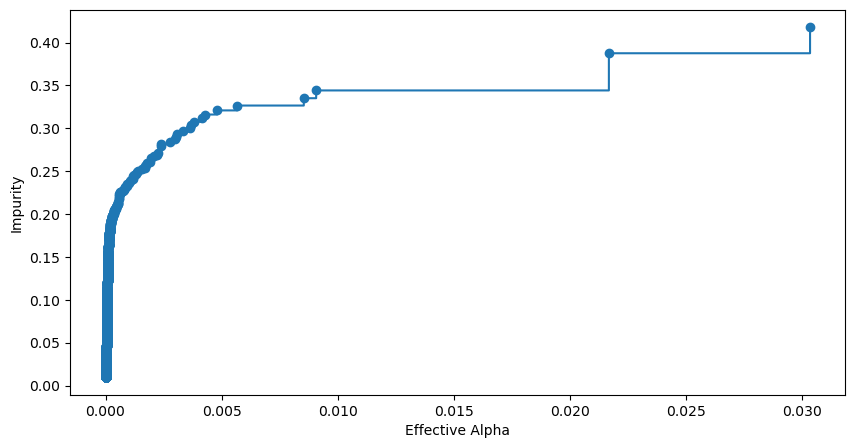

In [311]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Impurity")
plt.show()

In [312]:
clfs = []
for i in ccp:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha = i)
    clf.fit(xtrain_final, ytrain)
    clfs.append(clf)

print( clfs[-1].tree_.node_count, ccp[-1])

1 0.08205938055991474


#### Accuracy CCP

In [313]:
clfs = clfs[:-1]
ccp = ccp[:-1]
train_scores = [i.score(xtrain_final, ytrain) for i in clfs]
test_scores = [i.score(xtest_final, ytest) for i in clfs]

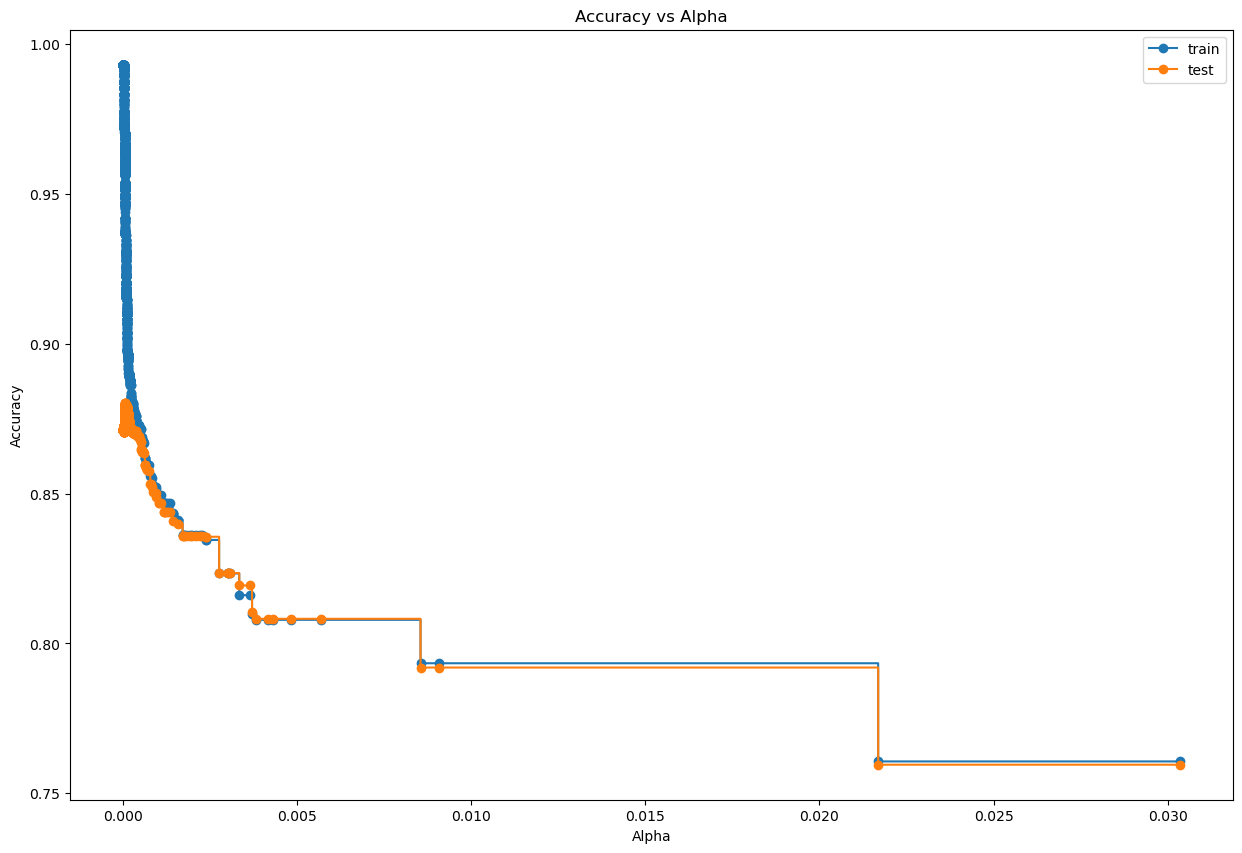

In [314]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [315]:
best_model_acc = clfs[np.argmax(test_scores)]
best_model_acc

DecisionTreeClassifier(ccp_alpha=6.544291887151782e-05, random_state=1)

In [316]:
print('Training accuracy of best model: ',best_model.score(xtrain_final,ytrain))
print('Test accuracy of best model: ',best_model.score(xtest_final, ytest))

Training accuracy of best model:  0.9387208569628229
Test accuracy of best model:  0.8803638702563631


#### Recall CCP

In [317]:
recall_train=[]
for i in clfs:
    pred_train_tree=i.predict(xtrain_final)
    values_train=metrics.recall_score(ytrain, pred_train_tree)
    recall_train.append(values_train)

In [318]:
recall_test=[]
for i in clfs:
    pred_test_tree=i.predict(xtest_final)
    values_test=metrics.recall_score(ytest, pred_test_tree)
    recall_test.append(values_test)

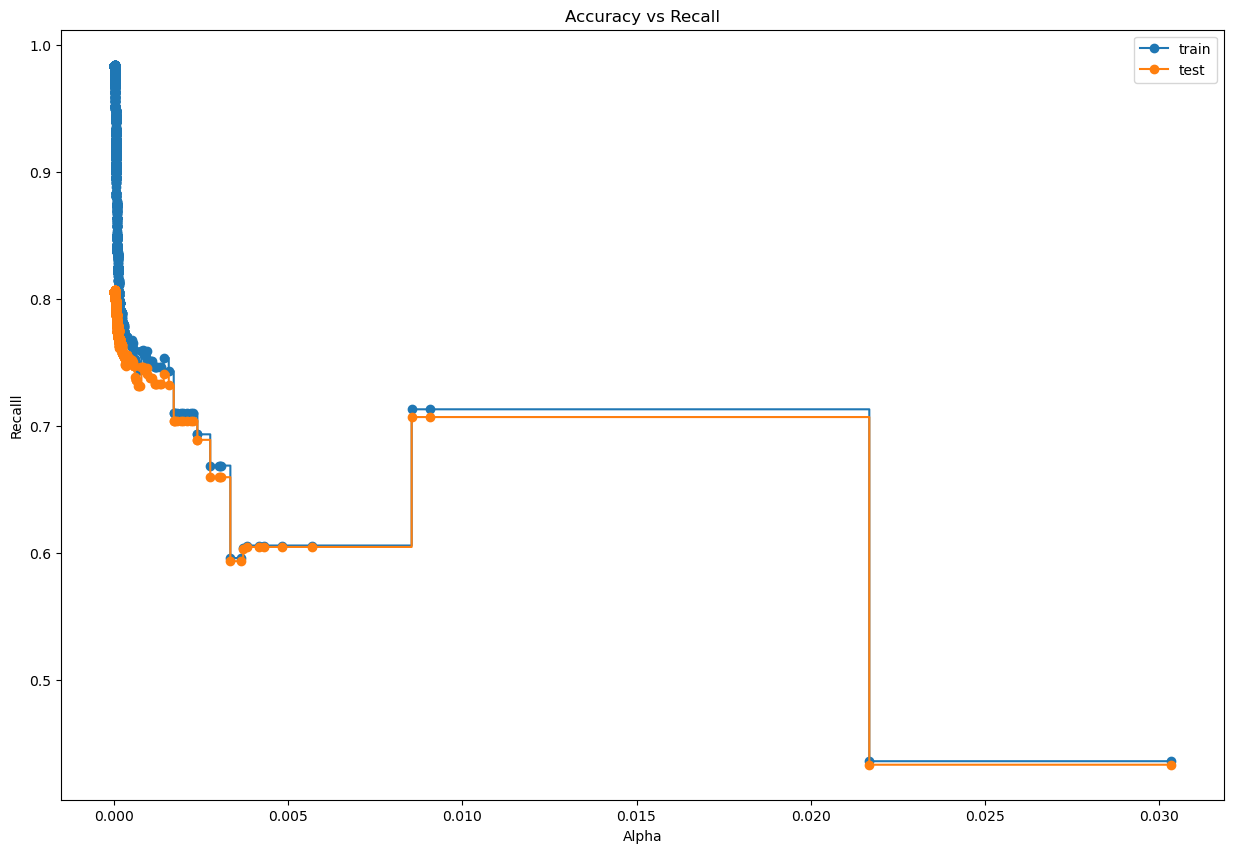

In [319]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recalll")
ax.set_title("Accuracy vs Recall")
ax.plot(ccp, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [92]:
best_model_recall = clfs[np.argmax(recall_test)]
best_model_recall

DecisionTreeClassifier(ccp_alpha=1.3354577029157997e-05, random_state=1)

In [93]:
pred_train_recall = best_model_recall.predict(xtrain_final)
pred_test_recall = best_model_recall.predict(xtest_final)

In [94]:
print('Recall Score for Training Set:', metrics.recall_score(ytrain, pred_train_recall))
print('Recall Score for Testing Set:', metrics.recall_score(ytest, pred_test_recall))

Recall Score for Training Set: 0.9846135352806827
Recall Score for Testing Set: 0.8070667414469994


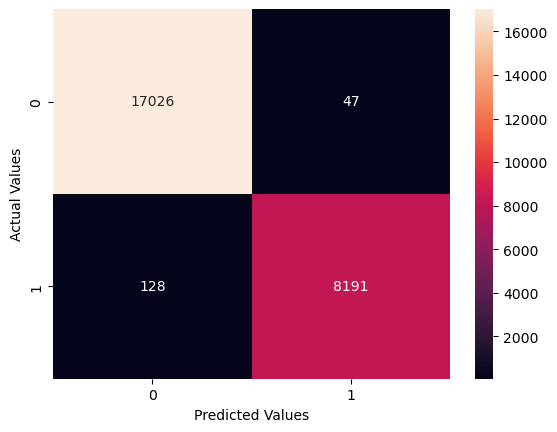

In [95]:
cm_tree(best_model_recall, xtrain_final, ytrain)

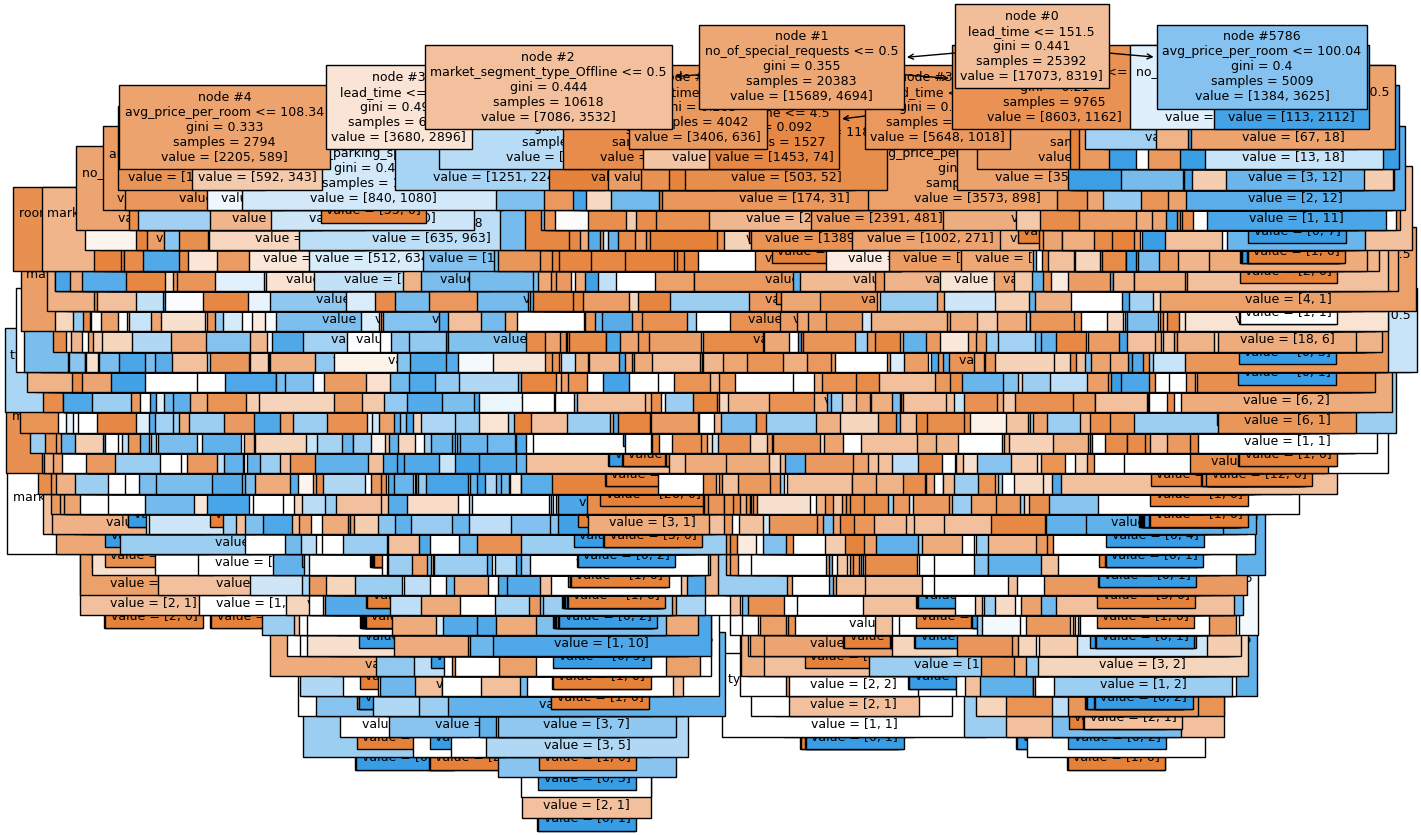

In [98]:
plt.figure(figsize=(15,10))
tree.plot_tree(best_model_recall, feature_names = xtrain_final.columns.tolist(),filled=True,fontsize=9, node_ids=True )
plt.show()

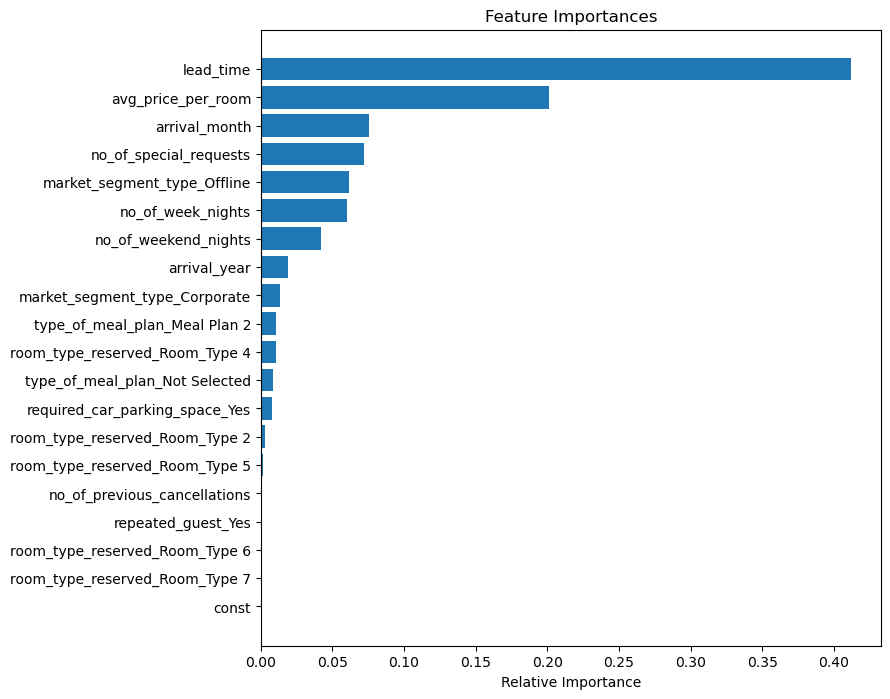

In [99]:
importances_recall = best_model_recall.feature_importances_
indices_recall = np.argsort(importances_recall)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices_recall)), importances_recall[indices_recall])
plt.yticks(range(len(indices_recall)), [xtrain_final.columns.tolist()[i] for i in indices_recall])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [105]:
comparison_chart = pd.DataFrame({
    'Train Recall' : [0.98, 0.71, 0.98] ,
    'Test Recall' : [0.80, 0.71, 0.81] , 
},index = ['Inital Tree', 'Tree with Hyperparameters', 'Tree with Post-Pruning'])

comparison_chart

,Train Recall,Test Recall
Inital Tree,0.98,0.80
Tree with Hyperparameters,0.71,0.71
Tree with Post-Pruning,0.98,0.81


It seems the post-pruned tree has the highest recall score on the test data, however, the tree itself is very complicated, and the hyperparameter tree still has good recall with a much simpler tree. It would be wise to deliberate on which tree would be better in this situation.   

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?

There are some ways the hotel can reduce the amount of cancelations. Firstly, according to the decision tree, lead time has been the most important factor in booking status, with higher lead times leading to higher cancellations. The hotel can impose an increasingly large fee when the time to the stay gets nearer and the guest wants to cancel. This would deter people from canceling at the last minute as much. The day and month of arrival are also important as certain days and months show that people are less likely to cancel, such as in October.  

According to the logistic model, a unit change in arrival year has the highest impact on whether a guest will cancel. If the book for the later year, the chance is higher. This coincides with the lead time conclusion and there should be a policy in place to offer a full refund should the guest cancel before a certain threshold, and a fee if done after. This way the hotel can have the best chance at keeping the room filled. 

The Online market segment seems to be the most popular, so the hotel can offer a more lenient refund or cancellation policy on this part while promoting other deals to make the segment more attractive and to potentially increase profits. 

- What other recommedations would you suggest to the hotel?

Repeat guests are the least likely factor when it comes to guests cancelling their booking. As such, offering deals for guests to return to the hotel would aid in keeping the rooms full while lower the likelihood of cancellation, thus leading to higher profits. 

Guests requiring a parking spot are also less likley to cancel. The hotel could make a partnership with car rental companies to encourage guests to have a car and require a spot, leading to less likelihood of cancellation. 

The odds show that the longer the booked stay is, the more likely it will be cancelled. As such, the hotel can incentivize people to stay on longer trips by offering discounts on other amenities the longer the booking stay is. This will help ensure that rooms stay booked and not wasted. 